<div style="text-align: center;">
  <h1 style="background-color: navy; color: white; padding: 10px;"><strong>(Title)</strong></h1>
</div>
<div style="text-align: center;">
<h4>by Cavalier </h4></div>


---

# **Business Understanding**

`Business Context` <br>
In the vehicle insurance industry, accurately predicting Customer Lifetime Value (CLV) is of the utmost importance for achieving maximum profitability and maintaining a competitive advantage. CLV provides insurance companies with insight into the long-term revenue potential of their customers, allowing them to make data-driven decisions about customer acquisition, retention, and resource allocation. 


`Market Overview` <br>
The vehicle insurance market is highly competitive, with numerous players vying for market share. Insurers aim to differentiate themselves through personalised services, competitive pricing, and targeted marketing strategies. It is therefore crucial for them to understand customer behaviour and value in order to maintain a competitive edge. As customer expectations evolve, leveraging data analytics to gain insights into customer segments and their potential value can significantly enhance a company's strategic approach.


`Analytical Approach` <br>
The analytical approach is as follows:
1. **Data Preparation** <br>
It is essential to clean and preprocess the dataset in order to handle missing values, outliers and ensure consistency. If necessary, encode categorical variables and normalise numerical features.

2. **Predictive Modelling**
   - Feature Selection: Identify and select the most relevant features that impact customer lifetime value (CLV).
   - Regression model. Develop and train a regression model (e.g. Random Forest, Gradient Boosting) to predict CLV based on historical data. It is important to evaluate the model using appropriate metrics, such as Mean Absolute Error (MAE) or R-squared, in order to ensure accuracy.

3. **CLustering Analysis**
   - Feature Engineering: The predicted CLV and other relevant features should be used for clustering.
   - K-Means Clustering: The K-Means algorithm should be applied to segment customers into distinct clusters based on their CLV and other relevant features.
   - Cluster Evaluation: It is important to analyse the clusters in order to gain an understanding of the characteristics of each segment. It is important to validate the results to ensure that the clusters are meaningful and actionable.
   
4. **Marketing Strategy**:
   - **Targeted Campaigns**: Design marketing campaigns that are tailored to the characteristics and needs of each customer segment.
   - **Resource Allocation**: Allocate marketing resources in a way that is efficient and based on the value and potential of each customer segment in order to maximise return on investment.


`Goals`

1. **Optimise Marketing Expenditure** <br>
By identifying high-value customers, companies can concentrate their marketing resources on acquiring and retaining these valuable segments, thereby increasing their overall return on investment.  
2. **Enhance Customer Retention**<br>
Predictive CLV models assist in the creation of personalised offers and services, enabling the retention of high-value customers and the reduction of customer churn while improving customer satisfaction.
3. **Improve Strategic Planning**<br>
Gaining insight into customer value allows insurers to create more effective long-term plans, link their objectives with customer requirements and adapt their offerings to better meet market expectations.
4. **Drive Business Growth**<br>
Correct calculations of CLV enable insurers to group customers more accurately, leading to more targeted marketing strategies and better customer engagement, which ultimately drives business growth and profitability.



> ^^ General Business Problem, will update the focused one after further discussion <br>
> ex : defining amount of budget for marketing campaign, etc

---

# **Data Understanding**

## Data Dictionary

| Column Name                     | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| Customer                        | Unique identifier for each customer                                         |
| State                           | State where the customer resides                                            |
| Customer Lifetime Value         | Estimated total revenue from the customer over their entire relationship    |
| Response                        | Customer's response to a marketing offer (Yes/No)                           |
| Coverage                        | Type of insurance coverage the customer has (e.g., Basic, Extended)         |
| Education                       | Highest level of education attained by the customer                         |
| Effective To Date               | Date when the insurance policy becomes effective                            |
| Employment Status               | Employment status of the customer (e.g., Employed, Unemployed, Retired)     |
| Gender                          | Gender of the customer (Male/Female)                                        |
| Income                          | Annual income of the customer                                               |
| Location Code                   | Code representing the type of location (e.g., Urban, Suburban, Rural)       |
| Marital Status                  | Marital status of the customer (e.g., Single, Married, Divorced)            |
| Monthly Premium Auto            | Monthly premium amount for the customer's auto insurance                    |
| Months Since Last Claim         | Number of months since the customer last filed a claim                      |
| Months Since Policy Inception   | Number of months since the policy was first initiated                       |
| Number of Open Complaints       | Number of open complaints the customer has with the insurance company       |
| Number of Policies              | Number of insurance policies the customer holds                             |
| Policy Type                     | Type of policy held by the customer (e.g., Corporate, Personal)             |
| Policy                          | Specific policy the customer has                                            |
| Renew Offer Type                | Type of renewal offer made to the customer (e.g., Offer1, Offer2)           |
| Sales Channel                   | Channel through which the policy was sold (e.g., Online, Agent)             |
| Total Claim Amount              | Total amount claimed by the customer                                        |
| Vehicle Class                   | Class of the vehicle insured (e.g., Sedan, SUV)                             |
| Vehicle Size                    | Size of the vehicle insured (e.g., Small, Medium, Large)                    |


## Data Preparation

In [675]:
# Importing all the libraries 

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer, mean_absolute_error, mean_squared_error

# Regression models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Utilities and Miscellaneous
import time
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [676]:
# read dataset 
df = pd.read_csv('new_dataset.csv')
df

Customer       State Response  Coverage             Education  \
0     YQ79307  Washington       No     Basic              Bachelor   
1     CY49953      Oregon       No  Extended               College   
2     XN16891     Arizona       No     Basic               College   
3     EP64069  California       No     Basic              Bachelor   
4     IW77519  Washington       No     Basic              Bachelor   
...       ...         ...      ...       ...                   ...   
7302  FX81675  California       No     Basic               College   
7303  ZU30804  California      Yes     Basic               College   
7304  LA53648  California       No  Extended  High School or Below   
7305  IS30295     Arizona      Yes  Extended              Bachelor   
7306  EH69733     Arizona       No  Extended              Bachelor   

     Effective To Date EmploymentStatus Gender  Income Location Code  \
0            10/1/2011         Employed      M   51144         Urban   
1              2/18/11       Unemployed      F       0      Suburban   
2              2/28/11         Employed      M   81097      Suburban   
3             8/1/2011         Employed      F   72264         Urban   
4              1/18/11         Employed      F   54737      Suburban   
...                ...              ...    ...     ...           ...   
7302           1/29/11         Employed      F   87957      Suburban   
7303          5/2/2011    Medical Leave      M   22520      Suburban   
7304           1/27/11       Unemployed      F       0      Suburban   
7305           2/27/11       Unemployed      F       0      Suburban   
7306           1/27/11         Employed      M   78092         Urban   

     Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0           Married                    61                       28   
1            Single                    79                       30   
2          Divorced                    74                        7   
3           Married                    64                        2   
4            Single                    66                        3   
...             ...                   ...                      ...   
7302       Divorced                    61                       31   
7303        Married                    73                       17   
7304         Single                   129                       13   
7305       Divorced                   139                        5   
7306        Married                    84                       34   

      Months Since Policy Inception  Number of Open Complaints  \
0                                32                          1   
1                                25                          0   
2                                67                          0   
3                                66                          0   
4                                86                          0   
...                             ...                        ...   
7302                             63                          0   
7303                             64                          0   
7304                              4                          0   
7305                             56                          0   
7306                             13                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
0                      9   Personal Auto   Personal L3           Offer1   
1                      1    Special Auto    Special L2           Offer3   
2                      1   Personal Auto   Personal L1           Offer4   
3                      9  Corporate Auto  Corporate L3           Offer3   
4                      1   Personal Auto   Personal L3           Offer3   
...                  ...             ...           ...              ...   
7302                   2   Personal Auto   Personal L3           Offer3   
7303                   3   Personal Auto   Personal L3           

In [677]:
# show data columns 
df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value'],
      dtype='object')

In [678]:
# show data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       7307 non-null   object 
 1   State                          7307 non-null   object 
 2   Response                       7307 non-null   object 
 3   Coverage                       7307 non-null   object 
 4   Education                      7307 non-null   object 
 5   Effective To Date              7307 non-null   object 
 6   EmploymentStatus               7307 non-null   object 
 7   Gender                         7307 non-null   object 
 8   Income                         7307 non-null   int64  
 9   Location Code                  7307 non-null   object 
 10  Marital Status                 7307 non-null   object 
 11  Monthly Premium Auto           7307 non-null   int64  
 12  Months Since Last Claim        7307 non-null   i

In [679]:
# defining numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()

In [680]:
# show data summary 
df_summary = pd.DataFrame({
    'columns' : df.columns, 
    'data type' : df.dtypes.values, 
    'n unique' : df.nunique(), 
    'unique sample' : [df[col].unique() for col in df.columns]
})
pd.set_option('display.max_colwidth', None)
df_summary

columns data type  \
Customer                                            Customer    object   
State                                                  State    object   
Response                                            Response    object   
Coverage                                            Coverage    object   
Education                                          Education    object   
Effective To Date                          Effective To Date    object   
EmploymentStatus                            EmploymentStatus    object   
Gender                                                Gender    object   
Income                                                Income     int64   
Location Code                                  Location Code    object   
Marital Status                                Marital Status    object   
Monthly Premium Auto                    Monthly Premium Auto     int64   
Months Since Last Claim              Months Since Last Claim     int64   
Months Since Policy Inception  Months Since Policy Inception     int64   
Number of Open Complaints          Number of Open Complaints     int64   
Number of Policies                        Number of Policies     int64   
Policy Type                                      Policy Type    object   
Policy                                                Policy    object   
Renew Offer Type                            Renew Offer Type    object   
Sales Channel                                  Sales Channel    object   
Total Claim Amount                        Total Claim Amount   float64   
Vehicle Class                                  Vehicle Class    object   
Vehicle Size                                    Vehicle Size    object   
Customer Lifetime Value              Customer Lifetime Value   float64   

                               n unique  \
Customer                           7307   
State                                 5   
Response                              2   
Coverage                              3   
Education                             5   
Effective To Date                    59   
EmploymentStatus                      5   
Gender                                2   
Income                             4652   
Location Code                         3   
Marital Status                        3   
Monthly Premium Auto                196   
Months Since Last Claim              36   
Months Since Policy Inception       100   
Number of Open Complaints             6   
Number of Policies                    9   
Policy Type                           3   
Policy                                9   
Renew Offer Type                      4   
Sales Channel                         4   
Total Claim Amount                 4129   
Vehicle Class                         6   
Vehicle Size                          3   
Customer Lifetime Value            6481   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Explanation of each type of policy 

1. **Personal Auto**: This policy is designed for individuals to protect their private vehicles used for everyday purposes. It typically covers damage to the vehicle, accidents, theft and liability for injury to third parties or damage to property. It provides basic protection for private cars against various risks associated with regular use.

2. **Corporate Auto**: This policy is for vehicles owned and operated by a company or organisation. It is often more comprehensive than personal insurance, covering risks associated with multiple drivers and business use of the vehicles. It provides comprehensive protection for company fleets and the unique risks associated with business use.

3. **Special Auto**: This policy is designed for vehicles with specific needs or characteristics, such as classic cars, luxury vehicles or those with unique modifications. It provides tailored cover to meet the special requirements of these vehicles, offering protection that standard policies may not cover, such as high value losses or specialised repairs.

- L1: Basic protection.
- L2: Mid-level protection with add-ons.
- L3: High-level cover with the most comprehensive coverage.

Corporate auto insurance premiums tend to be higher than personal auto insurance premiums. This is because corporate policies typically cover a broader range of risks and more vehicles, which can include high-value vehicles, and may involve multiple drivers with varying levels of driving experience. Additionally, corporate vehicles are often on the road more frequently, which increases the likelihood of accidents and claims. These factors contribute to higher insurance costs for corporate policies compared to personal auto insurance.

In 2024, auto insurance premiums have been rising overall due to various factors, including increased vehicle repair costs, higher accident rates, and inflation. However, the exact difference between corporate and personal auto insurance can vary depending on the specific coverage, the size of the fleet, and the type of vehicles insured <br><br>
sources : https://money.com/car-insurance-prices-2024-predictions/



In [681]:
# show descriptive analytics data
df.describe().T

count          mean           std  \
Income                         7307.0  37517.762556  30192.253906   
Monthly Premium Auto           7307.0     93.562748     34.679436   
Months Since Last Claim        7307.0     15.082660     10.104234   
Months Since Policy Inception  7307.0     47.958533     27.979702   
Number of Open Complaints      7307.0      0.380047      0.911466   
Number of Policies             7307.0      2.988230      2.400925   
Total Claim Amount             7307.0    437.157904    292.512144   
Customer Lifetime Value        7307.0   8022.789394   6791.672803   

                                       min          25%           50%  \
Income                            0.000000     0.000000  33806.000000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since Policy Inception     0.000000    24.000000     48.000000   
Number of Open Complaints         0.000000     0.000000      0.000000   
Number of Policies                1.000000     1.000000      2.000000   
Total Claim Amount                0.099007   275.345717    384.000000   
Customer Lifetime Value        1898.007675  4061.273191   5821.787383   

                                        75%           max  
Income                         61796.000000  99981.000000  
Monthly Premium Auto             109.000000    298.000000  
Months Since Last Claim           23.000000     35.000000  
Months Since Policy Inception     71.000000     99.000000  
Number of Open Complaints          0.000000      5.000000  
Number of Policies                 4.000000      9.000000  
Total Claim Amount               552.000000   2893.239678  
Customer Lifetime Value         9007.014951  83325.381190

---

# **Data Cleaning**

## 1. Duplicated Data

In [682]:
# counting duplicated data 
df.duplicated().sum()

0

In [683]:
# showing duplicated dataframe
df[df.duplicated()]

Empty DataFrame
Columns: [Customer, State, Response, Coverage, Education, Effective To Date, EmploymentStatus, Gender, Income, Location Code, Marital Status, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Policy Type, Policy, Renew Offer Type, Sales Channel, Total Claim Amount, Vehicle Class, Vehicle Size, Customer Lifetime Value]
Index: []

In [684]:
# checking duplicates without column customer 
check_dups = df.columns[1:].to_list()
dups = df.duplicated(subset=check_dups, keep=False)
dups_rows = df[dups].sort_values(by=check_dups)

# showing all duplicated rows 
dups_rows

Customer       State Response  Coverage             Education  \
276   PD66941     Arizona      Yes     Basic              Bachelor   
6372  OB49075     Arizona      Yes     Basic              Bachelor   
1710  IS63925     Arizona      Yes     Basic               College   
5836  CS93971     Arizona      Yes     Basic               College   
5098  VU99589     Arizona      Yes     Basic  High School or Below   
...       ...         ...      ...       ...                   ...   
7040  WT86597      Oregon      Yes  Extended                Master   
427   ET47892      Oregon      Yes   Premium               College   
2381  XS17260      Oregon      Yes   Premium               College   
76    KY33386  Washington      Yes     Basic  High School or Below   
1682  MW48891  Washington      Yes     Basic  High School or Below   

     Effective To Date EmploymentStatus Gender  Income Location Code  \
276           2/1/2011          Retired      M   17622      Suburban   
6372          2/1/2011          Retired      M   17622      Suburban   
1710           1/27/11          Retired      F   21073      Suburban   
5836           1/27/11          Retired      F   21073      Suburban   
5098           1/14/11         Employed      F   20090      Suburban   
...                ...              ...    ...     ...           ...   
7040           1/31/11       Unemployed      M       0      Suburban   
427           1/1/2011         Employed      M   88340      Suburban   
2381          1/1/2011         Employed      M   88340      Suburban   
76            2/1/2011       Unemployed      F       0      Suburban   
1682          2/1/2011       Unemployed      F       0      Suburban   

     Marital Status  Monthly Premium Auto  Months Since Last Claim  \
276        Divorced                    65                        1   
6372       Divorced                    65                        1   
1710       Divorced                   106                       25   
5836       Divorced                   106                       25   
5098        Married                   109                       10   
...             ...                   ...                      ...   
7040         Single                   125                        6   
427         Married                   102                       16   
2381        Married                   102                       16   
76         Divorced                   112                       12   
1682       Divorced                   112                       12   

      Months Since Policy Inception  Number of Open Complaints  \
276                              36                          1   
6372                             36                          1   
1710                             54                          1   
5836                             54                          1   
5098                             59                          0   
...                             ...                        ...   
7040                             61                          0   
427                               1                          0   
2381                              1                          0   
76                               93                          0   
1682                             93                          0   

      Number of Policies    Policy Type       Policy Renew Offer Type  \
276                    3  Personal Auto  Personal L3           Offer1   
6372                   3  Personal Auto  Personal L3           Offer1   
1710                   3  Personal Auto  Personal L2           Offer1   
5836                   3  Personal Auto  Personal L2           Offer1   
5098                   2  Personal Auto  Personal L3           Offer2   
...                  ...            ...          ...              ...   
7040                   2  Personal Auto  Personal L3           Offer1   
427                    2  Personal Auto  Personal L3           Offer1   
2381    

In [685]:
# Showing duplicated data to drop (first)
dups_first = df[df.duplicated(subset=check_dups, keep='first')].sort_values(by=check_dups)
dups_first

Customer       State Response  Coverage             Education  \
6372  OB49075     Arizona      Yes     Basic              Bachelor   
5836  CS93971     Arizona      Yes     Basic               College   
6296  TD86744     Arizona      Yes     Basic  High School or Below   
7002  PO90615     Arizona      Yes     Basic  High School or Below   
5879  OF77789     Arizona      Yes     Basic  High School or Below   
...       ...         ...      ...       ...                   ...   
4976  JL52508      Oregon      Yes  Extended                Doctor   
4775  CY47265      Oregon      Yes  Extended  High School or Below   
7040  WT86597      Oregon      Yes  Extended                Master   
2381  XS17260      Oregon      Yes   Premium               College   
1682  MW48891  Washington      Yes     Basic  High School or Below   

     Effective To Date EmploymentStatus Gender  Income Location Code  \
6372          2/1/2011          Retired      M   17622      Suburban   
5836           1/27/11          Retired      F   21073      Suburban   
6296           1/14/11         Employed      F   20090      Suburban   
7002         12/2/2011    Medical Leave      F   25965      Suburban   
5879          3/2/2011         Disabled      F   11904      Suburban   
...                ...              ...    ...     ...           ...   
4976           1/30/11         Employed      M   57709      Suburban   
4775           1/20/11          Retired      F   10312      Suburban   
7040           1/31/11       Unemployed      M       0      Suburban   
2381          1/1/2011         Employed      M   88340      Suburban   
1682          2/1/2011       Unemployed      F       0      Suburban   

     Marital Status  Monthly Premium Auto  Months Since Last Claim  \
6372       Divorced                    65                        1   
5836       Divorced                   106                       25   
6296        Married                   109                       10   
7002       Divorced                    65                       23   
5879         Single                    61                       34   
...             ...                   ...                      ...   
4976        Married                   125                       10   
4775        Married                    78                       10   
7040         Single                   125                        6   
2381        Married                   102                       16   
1682       Divorced                   112                       12   

      Months Since Policy Inception  Number of Open Complaints  \
6372                             36                          1   
5836                             54                          1   
6296                             59                          0   
7002                             27                          0   
5879                             11                          2   
...                             ...                        ...   
4976                             26                          0   
4775                             63                          0   
7040                             61                          0   
2381                              1                          0   
1682                             93                          0   

      Number of Policies    Policy Type       Policy Renew Offer Type  \
6372                   3  Personal Auto  Personal L3           Offer1   
5836                   3  Personal Auto  Personal L2           Offer1   
6296                   2  Personal Auto  Personal L3           Offer2   
7002                   1  Personal Auto  Personal L2           Offer1   
5879                   3  Personal Auto  Personal L3           Offer1   
...                  ...            ...          ...              ...   
4976                   1  Personal Auto  Personal L2           Offer2   
4775                   1  Personal Auto  Personal L3           Offer2   
7040    

In [686]:
# drop duplicated data
df.drop_duplicates(subset=check_dups, keep='first', inplace=True, ignore_index=True)
df

Customer       State Response  Coverage             Education  \
0     YQ79307  Washington       No     Basic              Bachelor   
1     CY49953      Oregon       No  Extended               College   
2     XN16891     Arizona       No     Basic               College   
3     EP64069  California       No     Basic              Bachelor   
4     IW77519  Washington       No     Basic              Bachelor   
...       ...         ...      ...       ...                   ...   
7199  FX81675  California       No     Basic               College   
7200  ZU30804  California      Yes     Basic               College   
7201  LA53648  California       No  Extended  High School or Below   
7202  IS30295     Arizona      Yes  Extended              Bachelor   
7203  EH69733     Arizona       No  Extended              Bachelor   

     Effective To Date EmploymentStatus Gender  Income Location Code  \
0            10/1/2011         Employed      M   51144         Urban   
1              2/18/11       Unemployed      F       0      Suburban   
2              2/28/11         Employed      M   81097      Suburban   
3             8/1/2011         Employed      F   72264         Urban   
4              1/18/11         Employed      F   54737      Suburban   
...                ...              ...    ...     ...           ...   
7199           1/29/11         Employed      F   87957      Suburban   
7200          5/2/2011    Medical Leave      M   22520      Suburban   
7201           1/27/11       Unemployed      F       0      Suburban   
7202           2/27/11       Unemployed      F       0      Suburban   
7203           1/27/11         Employed      M   78092         Urban   

     Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0           Married                    61                       28   
1            Single                    79                       30   
2          Divorced                    74                        7   
3           Married                    64                        2   
4            Single                    66                        3   
...             ...                   ...                      ...   
7199       Divorced                    61                       31   
7200        Married                    73                       17   
7201         Single                   129                       13   
7202       Divorced                   139                        5   
7203        Married                    84                       34   

      Months Since Policy Inception  Number of Open Complaints  \
0                                32                          1   
1                                25                          0   
2                                67                          0   
3                                66                          0   
4                                86                          0   
...                             ...                        ...   
7199                             63                          0   
7200                             64                          0   
7201                              4                          0   
7202                             56                          0   
7203                             13                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
0                      9   Personal Auto   Personal L3           Offer1   
1                      1    Special Auto    Special L2           Offer3   
2                      1   Personal Auto   Personal L1           Offer4   
3                      9  Corporate Auto  Corporate L3           Offer3   
4                      1   Personal Auto   Personal L3           Offer3   
...                  ...             ...           ...              ...   
7199                   2   Personal Auto   Personal L3           Offer3   
7200                   3   Personal Auto   Personal L3           

## 2. Missing Values

In [687]:
# counting missing values
df.isna().sum()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Customer Lifetime Value          0
dtype: int64

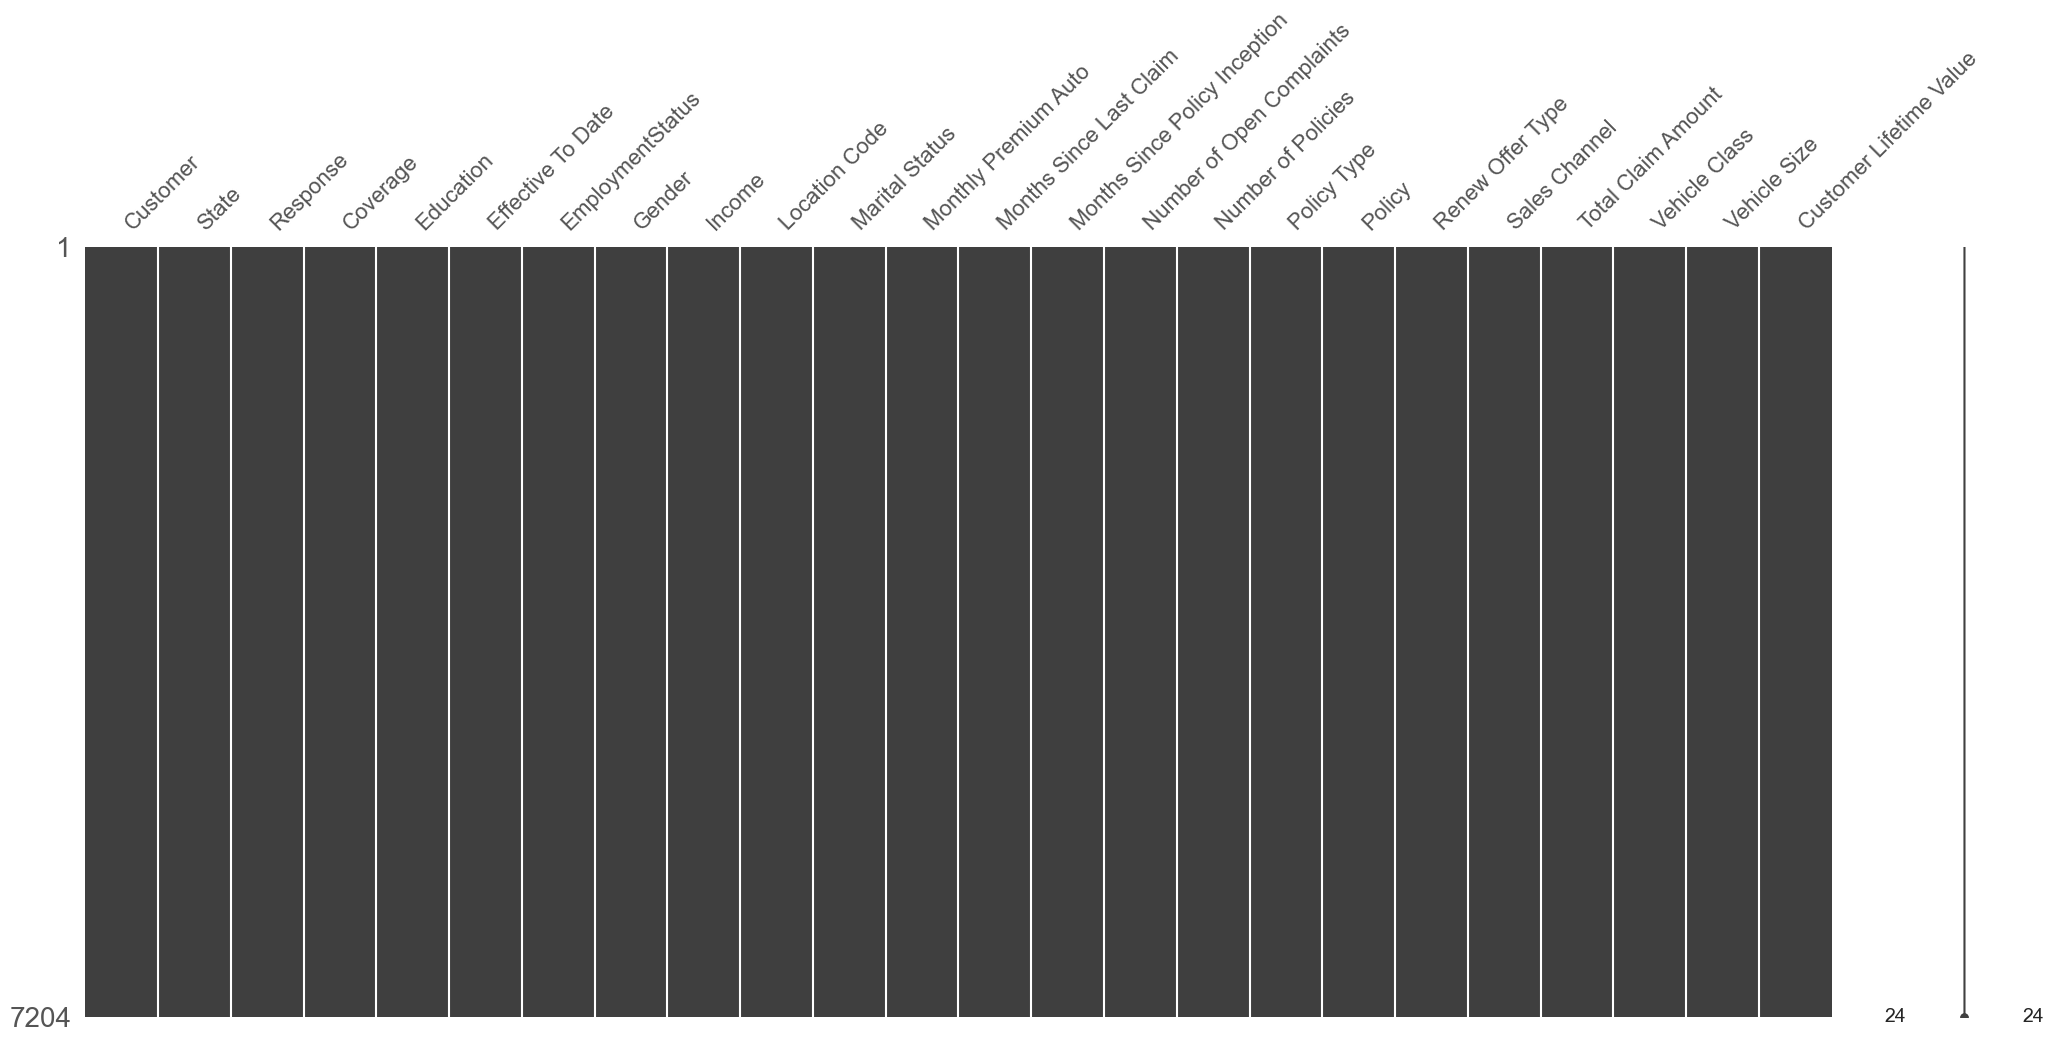

In [688]:
# missing values visualizations
msn.matrix(df)
plt.show()

## 3. Change Dtype

In [689]:
# changing Effective to Date data type to datetime
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], format='mixed')
df

Customer       State Response  Coverage             Education  \
0     YQ79307  Washington       No     Basic              Bachelor   
1     CY49953      Oregon       No  Extended               College   
2     XN16891     Arizona       No     Basic               College   
3     EP64069  California       No     Basic              Bachelor   
4     IW77519  Washington       No     Basic              Bachelor   
...       ...         ...      ...       ...                   ...   
7199  FX81675  California       No     Basic               College   
7200  ZU30804  California      Yes     Basic               College   
7201  LA53648  California       No  Extended  High School or Below   
7202  IS30295     Arizona      Yes  Extended              Bachelor   
7203  EH69733     Arizona       No  Extended              Bachelor   

     Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2011-10-01         Employed      M   51144         Urban   
1           2011-02-18       Unemployed      F       0      Suburban   
2           2011-02-28         Employed      M   81097      Suburban   
3           2011-08-01         Employed      F   72264         Urban   
4           2011-01-18         Employed      F   54737      Suburban   
...                ...              ...    ...     ...           ...   
7199        2011-01-29         Employed      F   87957      Suburban   
7200        2011-05-02    Medical Leave      M   22520      Suburban   
7201        2011-01-27       Unemployed      F       0      Suburban   
7202        2011-02-27       Unemployed      F       0      Suburban   
7203        2011-01-27         Employed      M   78092         Urban   

     Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0           Married                    61                       28   
1            Single                    79                       30   
2          Divorced                    74                        7   
3           Married                    64                        2   
4            Single                    66                        3   
...             ...                   ...                      ...   
7199       Divorced                    61                       31   
7200        Married                    73                       17   
7201         Single                   129                       13   
7202       Divorced                   139                        5   
7203        Married                    84                       34   

      Months Since Policy Inception  Number of Open Complaints  \
0                                32                          1   
1                                25                          0   
2                                67                          0   
3                                66                          0   
4                                86                          0   
...                             ...                        ...   
7199                             63                          0   
7200                             64                          0   
7201                              4                          0   
7202                             56                          0   
7203                             13                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
0                      9   Personal Auto   Personal L3           Offer1   
1                      1    Special Auto    Special L2           Offer3   
2                      1   Personal Auto   Personal L1           Offer4   
3                      9  Corporate Auto  Corporate L3           Offer3   
4                      1   Personal Auto   Personal L3           Offer3   
...                  ...             ...           ...              ...   
7199                   2   Personal Auto   Personal L3           Offer3   
7200                   3   Personal Auto   Personal L3           

In [690]:
# inspecting effective to date columns
df['Effective To Date'].value_counts()

Effective To Date
2011-10-01    156
2011-01-27    149
2011-01-17    149
2011-02-14    145
2011-01-31    143
2011-01-19    141
2011-02-19    138
2011-01-26    137
2011-03-01    136
2011-01-20    135
2011-02-26    134
2011-01-28    133
2011-02-27    133
2011-11-01    132
2011-02-22    131
2011-04-02    130
2011-05-02    129
2011-02-28    129
2011-12-02    128
2011-01-24    125
2011-01-01    125
2011-10-02    124
2011-02-01    124
2011-01-18    124
2011-01-21    123
2011-11-02    123
2011-09-01    122
2011-05-01    122
2011-02-25    120
2011-01-14    120
2011-02-18    119
2011-01-02    119
2011-01-15    119
2011-07-01    118
2011-02-13    118
2011-01-25    118
2011-01-13    118
2011-01-23    118
2011-02-21    118
2011-06-01    117
2011-02-24    117
2011-01-29    117
2011-02-23    116
2011-03-02    115
2011-01-16    115
2011-01-30    115
2011-07-02    114
2011-06-02    114
2011-02-02    114
2011-09-02    110
2011-01-22    105
2011-08-02    105
2011-02-17    104
2011-02-15    104
2011-02-16

## 4. Delete Columns 

> - Effective To Date (The date until the policy is effective) is related to Months Since Policy Inception (Duration), so it will be removed as it is not required for analysis.
> - Customer data will also be removed as it is not necessary for the analysis.

In [691]:
# dropping unnecessary columns
df.drop(columns= ['Customer', 'Effective To Date'], inplace=True)
df

State Response  Coverage             Education EmploymentStatus  \
0     Washington       No     Basic              Bachelor         Employed   
1         Oregon       No  Extended               College       Unemployed   
2        Arizona       No     Basic               College         Employed   
3     California       No     Basic              Bachelor         Employed   
4     Washington       No     Basic              Bachelor         Employed   
...          ...      ...       ...                   ...              ...   
7199  California       No     Basic               College         Employed   
7200  California      Yes     Basic               College    Medical Leave   
7201  California       No  Extended  High School or Below       Unemployed   
7202     Arizona      Yes  Extended              Bachelor       Unemployed   
7203     Arizona       No  Extended              Bachelor         Employed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0         M   51144         Urban        Married                    61   
1         F       0      Suburban         Single                    79   
2         M   81097      Suburban       Divorced                    74   
3         F   72264         Urban        Married                    64   
4         F   54737      Suburban         Single                    66   
...     ...     ...           ...            ...                   ...   
7199      F   87957      Suburban       Divorced                    61   
7200      M   22520      Suburban        Married                    73   
7201      F       0      Suburban         Single                   129   
7202      F       0      Suburban       Divorced                   139   
7203      M   78092         Urban        Married                    84   

      Months Since Last Claim  Months Since Policy Inception  \
0                          28                             32   
1                          30                             25   
2                           7                             67   
3                           2                             66   
4                           3                             86   
...                       ...                            ...   
7199                       31                             63   
7200                       17                             64   
7201                       13                              4   
7202                        5                             56   
7203                       34                             13   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             1                   9   Personal Auto   
1                             0                   1    Special Auto   
2                             0                   1   Personal Auto   
3                             0                   9  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
7199                          0                   2   Personal Auto   
7200                          0                   3   Personal Auto   
7201                          0                   7   Personal Auto   
7202                          0                   2   Personal Auto   
7203                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0      Personal L3           Offer1         Agent          223.305224   
1       Special L2           Offer3        Branch          568.800000   
2      Personal L1           Offer4         Agent          355.200000   
3     Corporate L3           Offer3           Web          272.649844   
4      Personal L3           Offer3           Web          391.970334   
...            ...              ...           ...                 ...   
7199   Personal L3           Offer3         Agent   

## 5. Delete Rows

> We will remove several some anomalies rows because it's impossible for the months since last claim to be greater than the months since policy inception if the insurance policy is only less than equal to 1.

In [692]:
# Inspecting anomalies 
check_anomalies = df[(df['Months Since Last Claim'] > df['Months Since Policy Inception']) & (df['Number of Policies'] <= 1)]
check_anomalies

State Response  Coverage             Education EmploymentStatus  \
1         Oregon       No  Extended               College       Unemployed   
8         Oregon       No   Premium               College    Medical Leave   
24       Arizona       No     Basic               College         Employed   
44        Oregon       No   Premium  High School or Below         Employed   
57    California       No     Basic  High School or Below       Unemployed   
...          ...      ...       ...                   ...              ...   
7152      Nevada       No  Extended               College       Unemployed   
7154     Arizona       No     Basic              Bachelor         Employed   
7163      Oregon      Yes     Basic              Bachelor         Employed   
7170      Nevada       No     Basic              Bachelor    Medical Leave   
7203     Arizona       No  Extended              Bachelor         Employed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
1         F       0      Suburban         Single                    79   
8         M   12811      Suburban        Married                   150   
24        F   37811      Suburban        Married                    63   
44        M   56855      Suburban         Single                   255   
57        F       0      Suburban         Single                   113   
...     ...     ...           ...            ...                   ...   
7152      M       0      Suburban         Single                    91   
7154      M   59665         Urban         Single                    62   
7163      F   89451         Rural         Single                    63   
7170      F   19352      Suburban        Married                    65   
7203      M   78092         Urban        Married                    84   

      Months Since Last Claim  Months Since Policy Inception  \
1                          30                             25   
8                          27                              0   
24                         25                             14   
44                         12                              1   
57                         35                             29   
...                       ...                            ...   
7152                       12                              6   
7154                       33                              3   
7163                       11                              2   
7170                       16                              0   
7203                       34                             13   

      Number of Open Complaints  Number of Policies     Policy Type  \
1                             0                   1    Special Auto   
8                             2                   1  Corporate Auto   
24                            0                   1    Special Auto   
44                            0                   1  Corporate Auto   
57                            0                   1   Personal Auto   
...                         ...                 ...             ...   
7152                          0                   1  Corporate Auto   
7154                          1                   1   Personal Auto   
7163                          0                   1   Personal Auto   
7170                          0                   1   Personal Auto   
7203                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
1       Special L2           Offer3        Branch          568.800000   
8     Corporate L2           Offer2   Call Center          720.000000   
24      Special L2           Offer4         Agent          365.002909   
44    Corporate L3           Offer4           Web         1836.000000   
57     Personal L1           Offer2   Call Center         1305.275432   
...            ...              ...           ...                 ...   
7152  Corporate L3           Offer2   Call Center   

In [693]:
# Dropping anomalies data 
df.drop(check_anomalies.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [694]:
# check updated dataframe 
df

State Response  Coverage             Education EmploymentStatus  \
0     Washington       No     Basic              Bachelor         Employed   
1        Arizona       No     Basic               College         Employed   
2     California       No     Basic              Bachelor         Employed   
3     Washington       No     Basic              Bachelor         Employed   
4     California       No     Basic               College         Employed   
...          ...      ...       ...                   ...              ...   
6783      Oregon       No     Basic               College         Disabled   
6784  California       No     Basic               College         Employed   
6785  California      Yes     Basic               College    Medical Leave   
6786  California       No  Extended  High School or Below       Unemployed   
6787     Arizona      Yes  Extended              Bachelor       Unemployed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0         M   51144         Urban        Married                    61   
1         M   81097      Suburban       Divorced                    74   
2         F   72264         Urban        Married                    64   
3         F   54737      Suburban         Single                    66   
4         F   38898      Suburban       Divorced                   117   
...     ...     ...           ...            ...                   ...   
6783      F   12180      Suburban         Single                   113   
6784      F   87957      Suburban       Divorced                    61   
6785      M   22520      Suburban        Married                    73   
6786      F       0      Suburban         Single                   129   
6787      F       0      Suburban       Divorced                   139   

      Months Since Last Claim  Months Since Policy Inception  \
0                          28                             32   
1                           7                             67   
2                           2                             66   
3                           3                             86   
4                          26                             68   
...                       ...                            ...   
6783                       17                             62   
6784                       31                             63   
6785                       17                             64   
6786                       13                              4   
6787                        5                             56   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             1                   9   Personal Auto   
1                             0                   1   Personal Auto   
2                             0                   9  Corporate Auto   
3                             0                   1   Personal Auto   
4                             0                   3  Corporate Auto   
...                         ...                 ...             ...   
6783                          0                   3  Corporate Auto   
6784                          0                   2   Personal Auto   
6785                          0                   3   Personal Auto   
6786                          0                   7   Personal Auto   
6787                          0                   2   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0      Personal L3           Offer1         Agent          223.305224   
1      Personal L1           Offer4         Agent          355.200000   
2     Corporate L3           Offer3           Web          272.649844   
3      Personal L3           Offer3           Web          391.970334   
4     Corporate L2           Offer1         Agent          561.600000   
...            ...              ...           ...                 ...   
6783  Corporate L3           Offer1         Agent   

## 6. Outliers

In [695]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

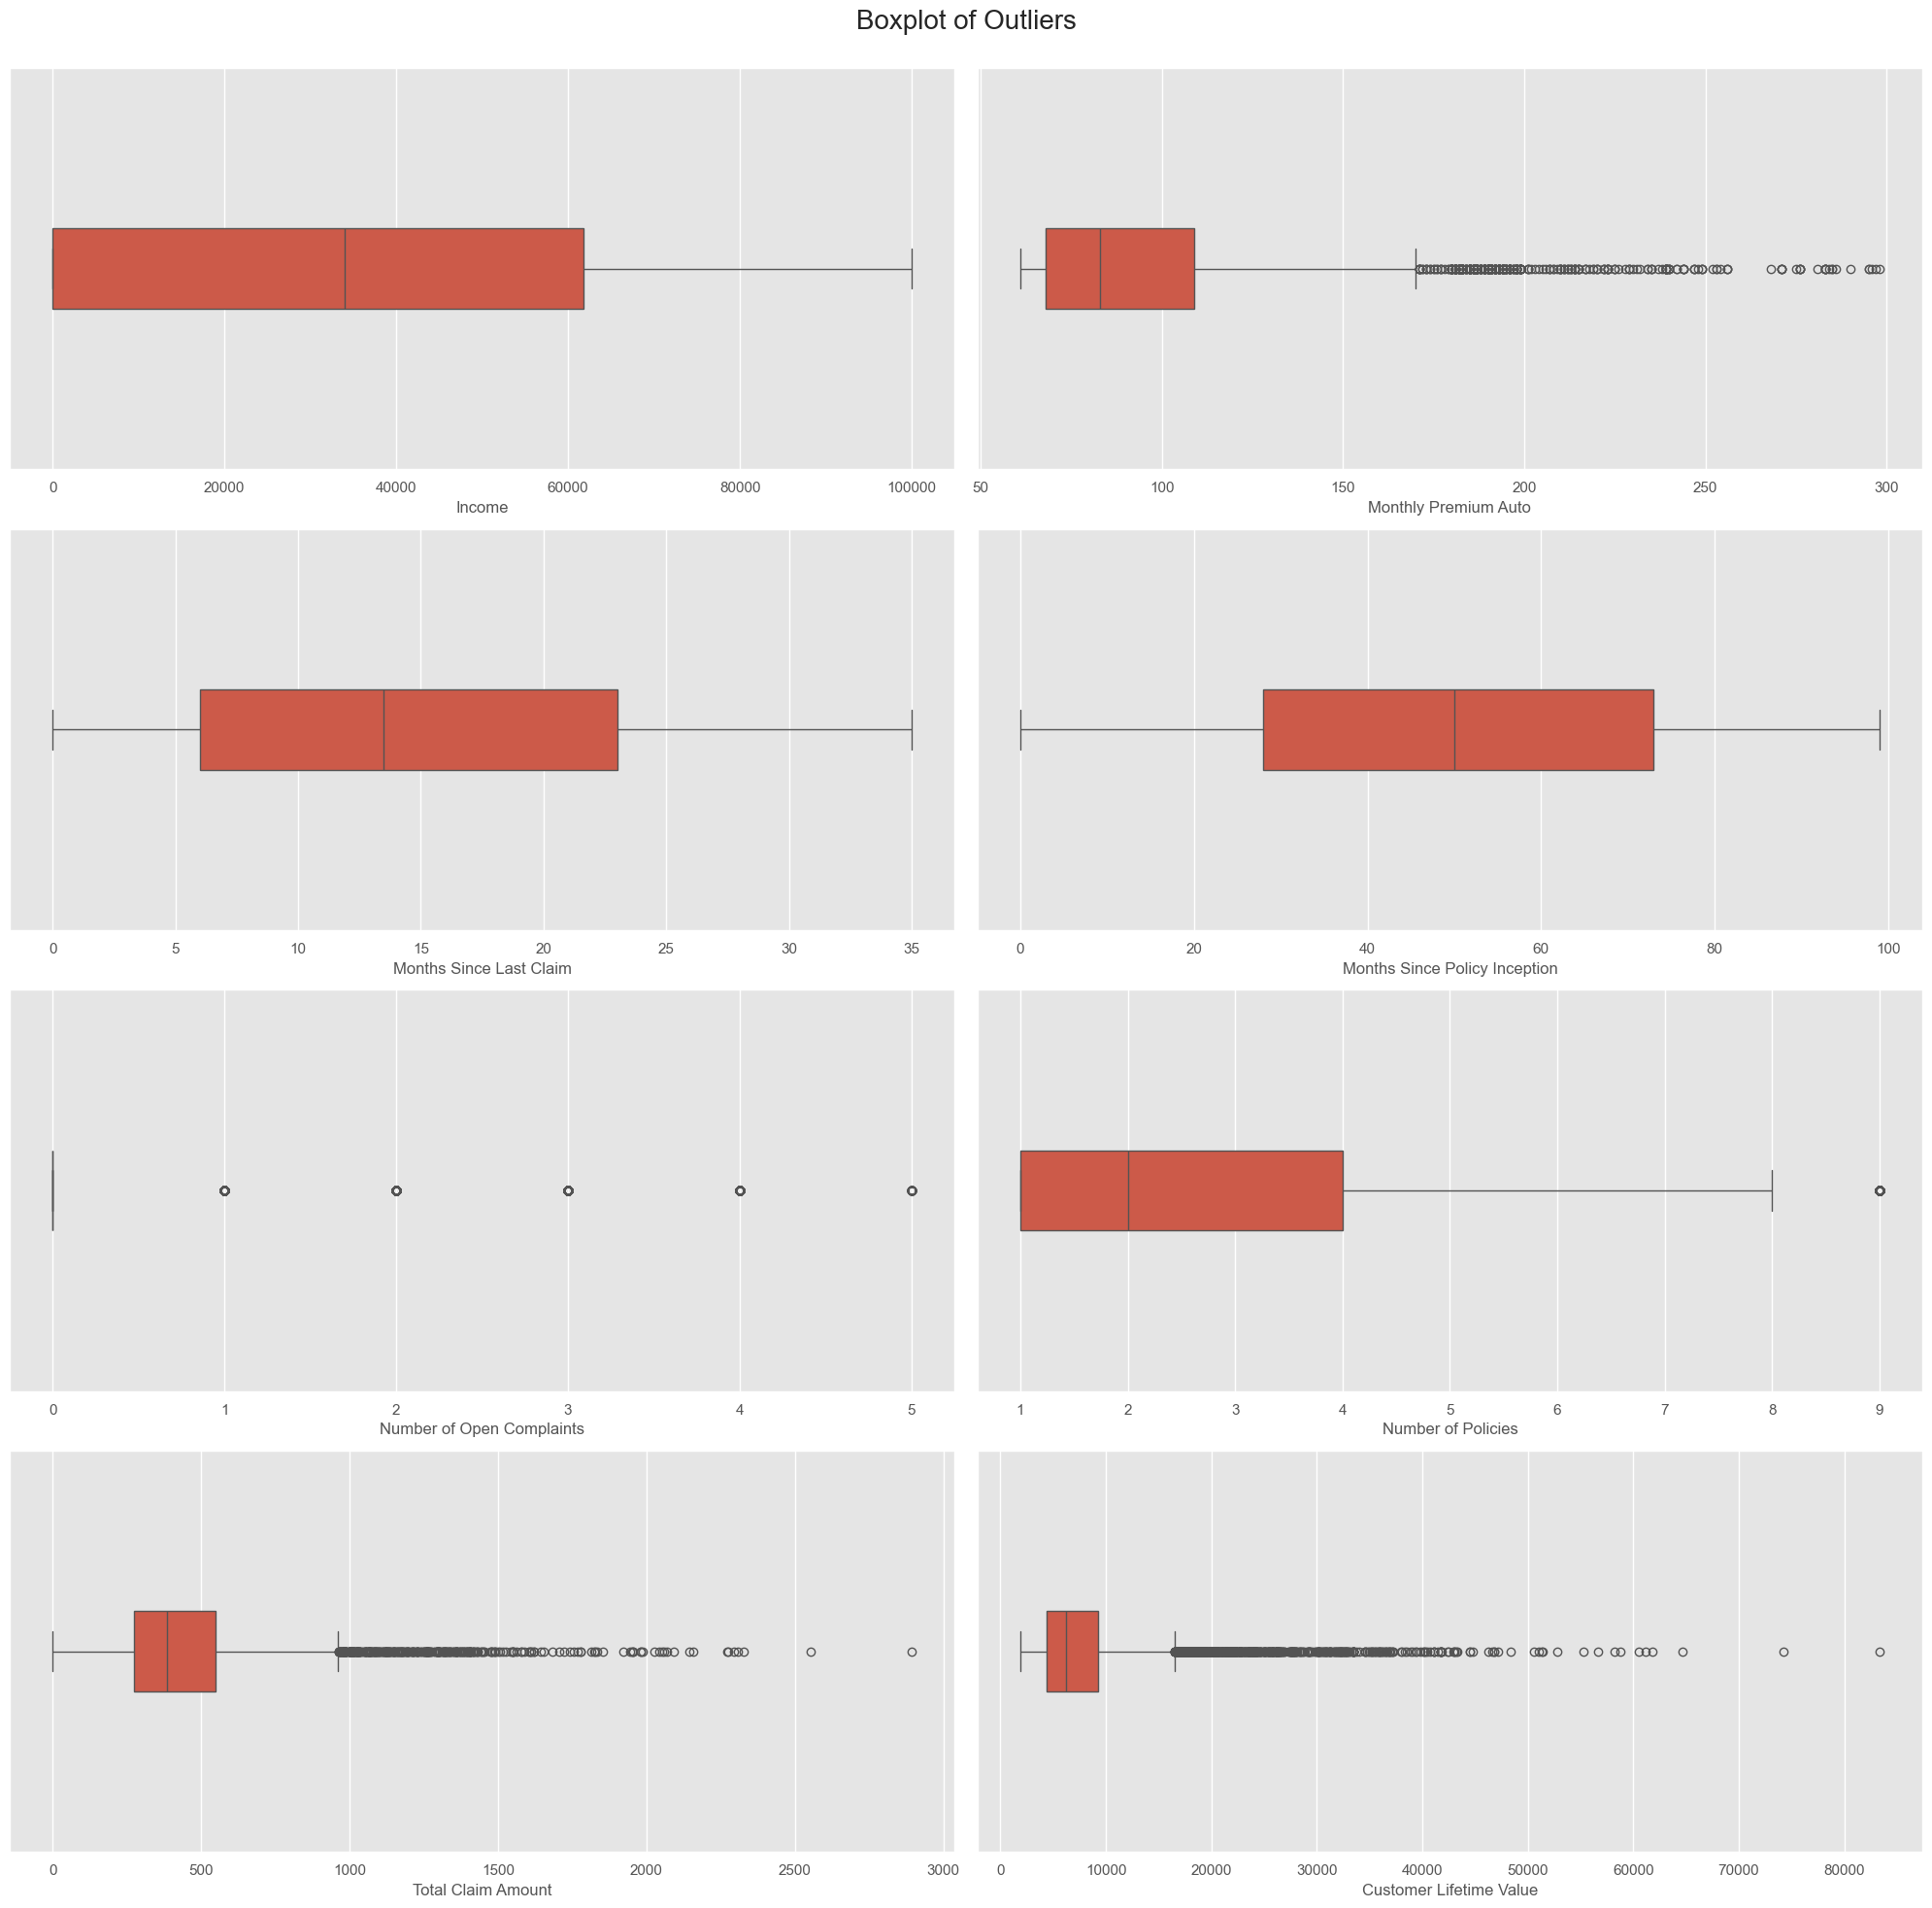

In [696]:
# Boxplot Outliers 

fig, ax = plt.subplots(4,2, figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, 
                data=df, 
                width=0.2, 
                ax=ax[i])

fig.suptitle('Boxplot of Outliers', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [697]:
# showing amount of the outliers 

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in num_cols: 
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i]*100),2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])


outlier_df = pd.DataFrame(outlier_data, columns=['column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'])
outlier_df

column  total_outlier  percentage   lower_bound  \
0                         Income              0        0.00 -92711.250000   
1           Monthly Premium Auto            343        0.05      6.500000   
2        Months Since Last Claim              0        0.00    -19.500000   
3  Months Since Policy Inception              0        0.00    -39.500000   
4      Number of Open Complaints           1379        0.20      0.000000   
5             Number of Policies            338        0.05     -3.500000   
6             Total Claim Amount            355        0.05   -140.986402   
7        Customer Lifetime Value            627        0.09  -2898.656504   

     upper_bound  
0  154518.750000  
1     170.500000  
2      48.500000  
3     140.500000  
4       0.000000  
5       8.500000  
6     962.218515  
7   16492.804596

> There will be no removal of outliers as these will be useful for our further analysis.

---

# **Exploratory Data Analysis**

## Barplots

In [698]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()

In [699]:
for col in cat_cols: 
    print({col: df[col].nunique()})
    

{'State': 5}
{'Response': 2}
{'Coverage': 3}
{'Education': 5}
{'EmploymentStatus': 5}
{'Gender': 2}
{'Location Code': 3}
{'Marital Status': 3}
{'Policy Type': 3}
{'Policy': 9}
{'Renew Offer Type': 4}
{'Sales Channel': 4}
{'Vehicle Class': 6}
{'Vehicle Size': 3}


> removing customer and effective to date from cat_cols because too many unique values

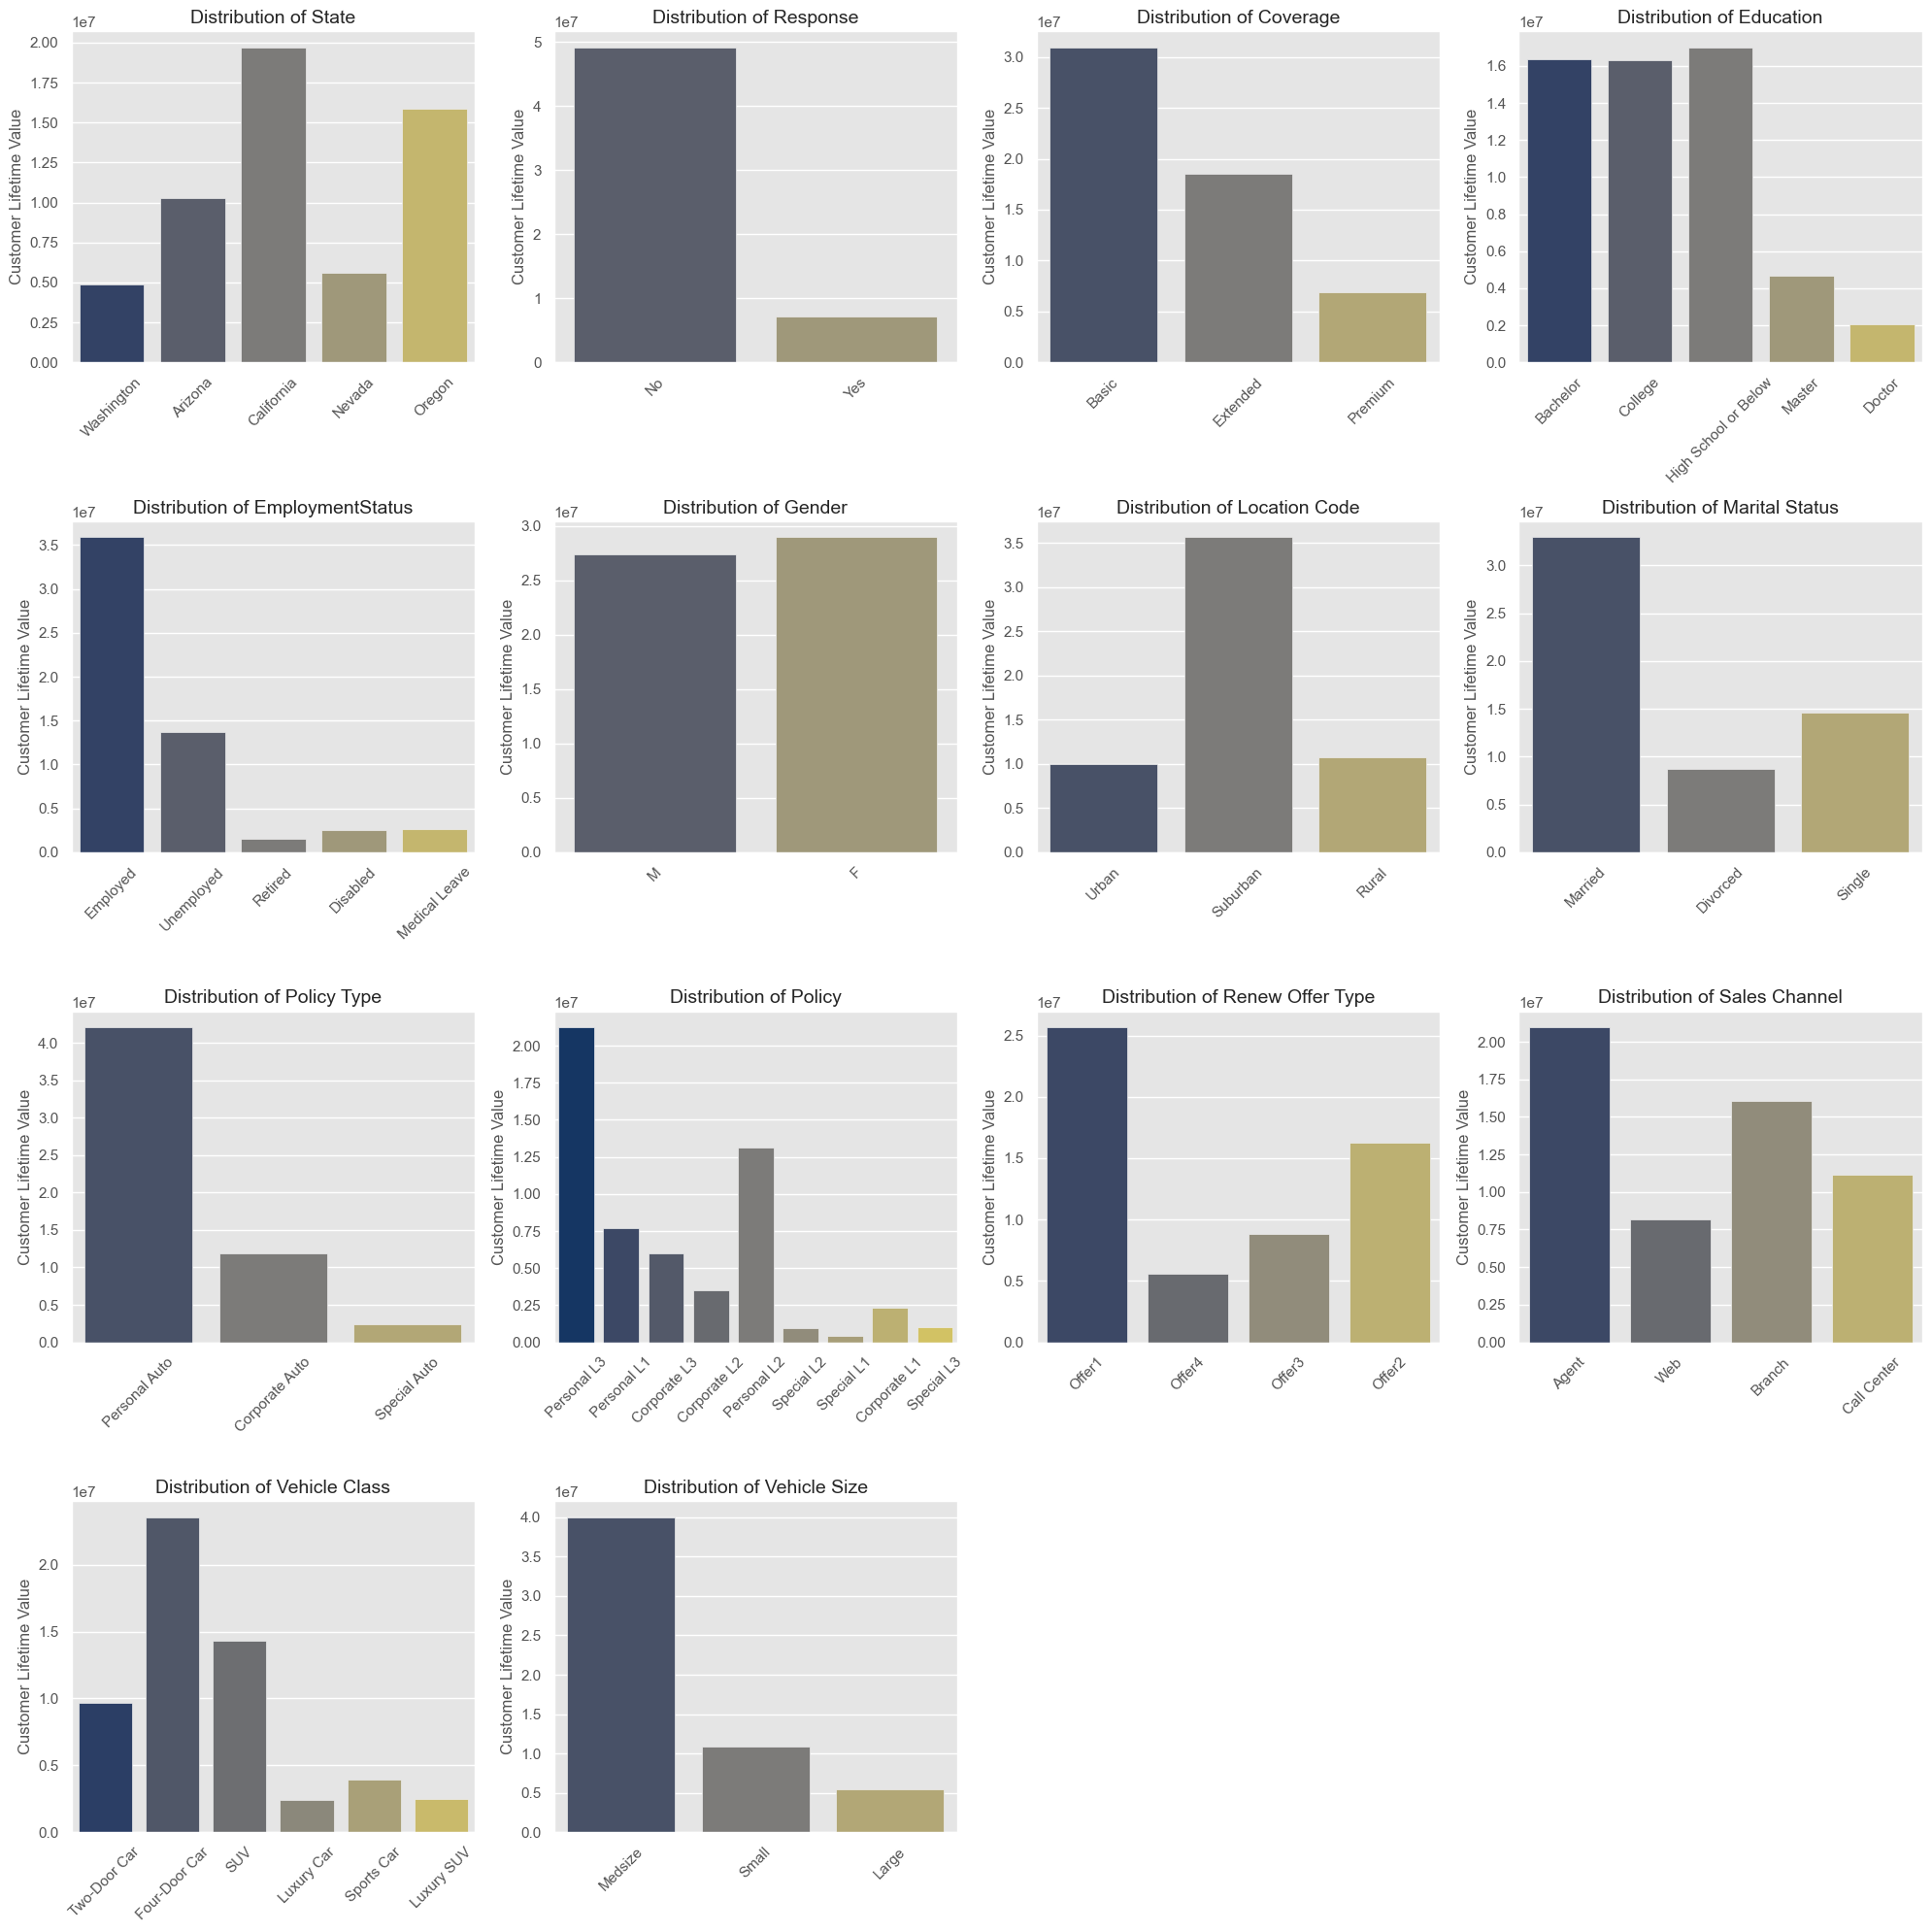

In [700]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()  

# Create a barplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.barplot(x=col, 
                  y= 'Customer Lifetime Value',
                  data=df, 
                  palette= 'cividis',
                  estimator=sum, 
                  ci=None,
                  ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='x', rotation=45) 

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [701]:
df['Response'].value_counts()

Response
No     5903
Yes     885
Name: count, dtype: int64

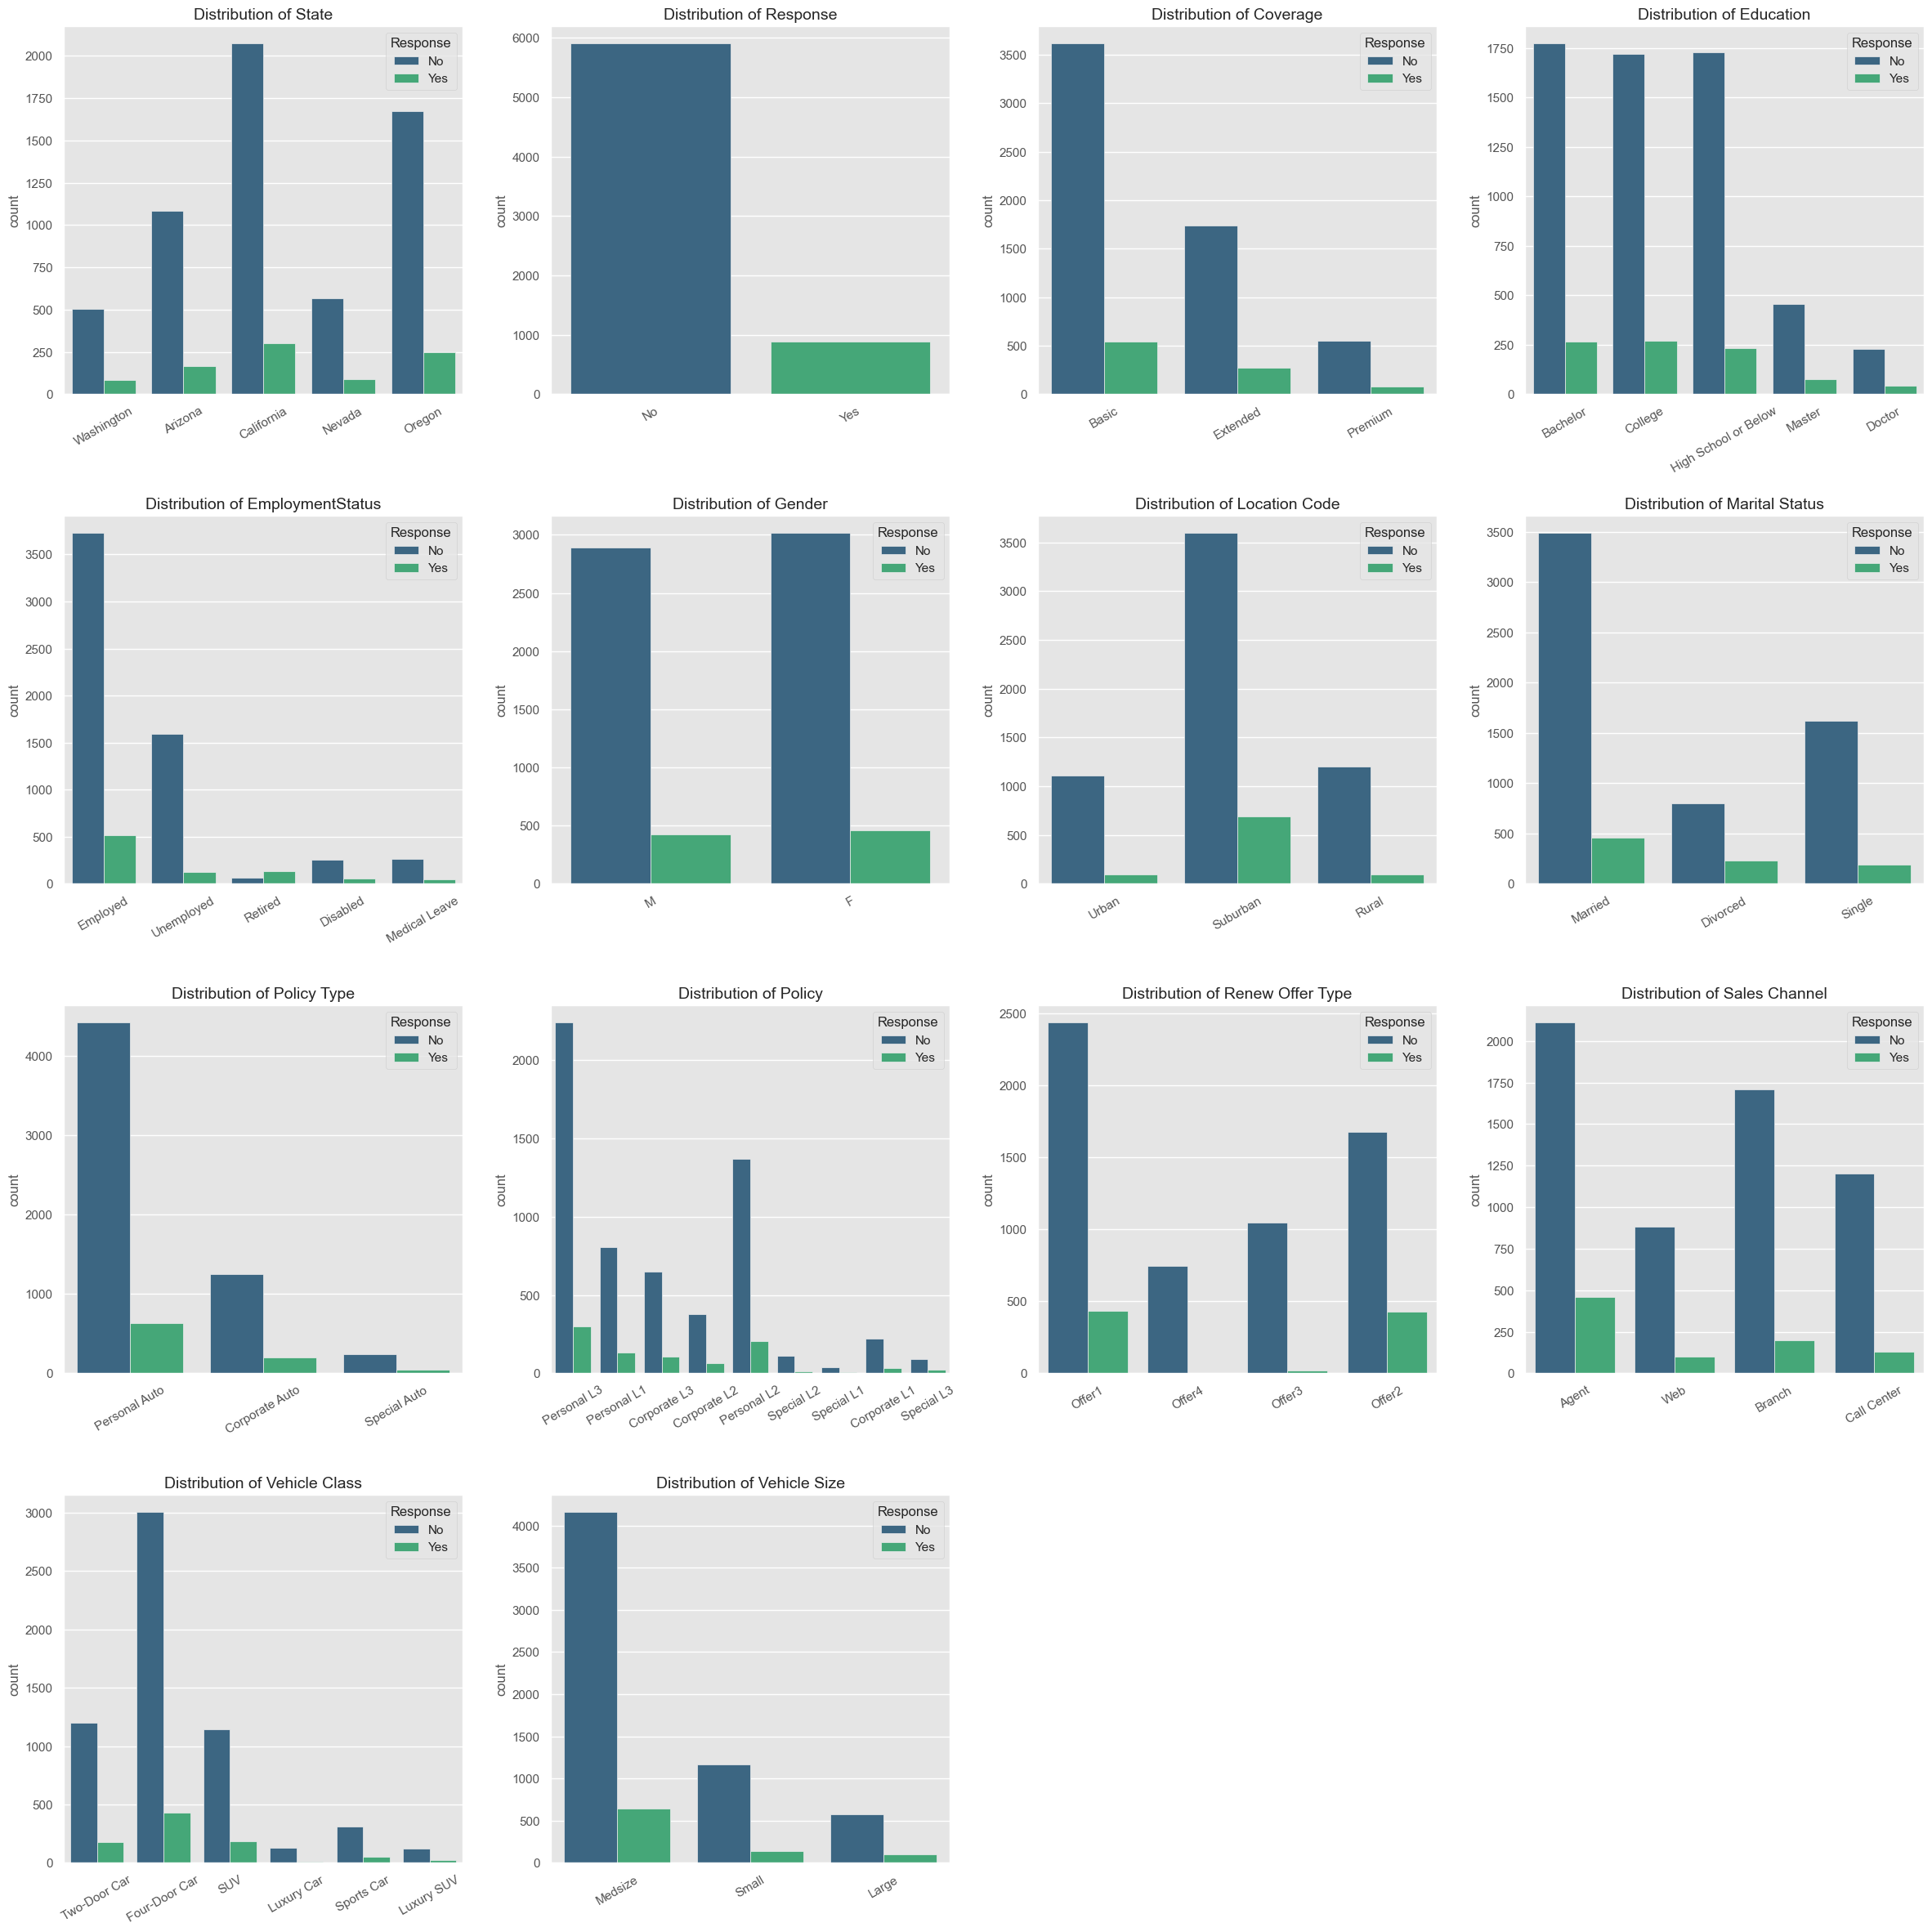

In [702]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
axes = axes.flatten()  

# Create a barplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col,
                  data=df, 
                  palette='viridis',
                  hue= 'Response',
                  ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x labels slightly less

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)  # Add padding to layout
plt.show()


## Pie Chart 

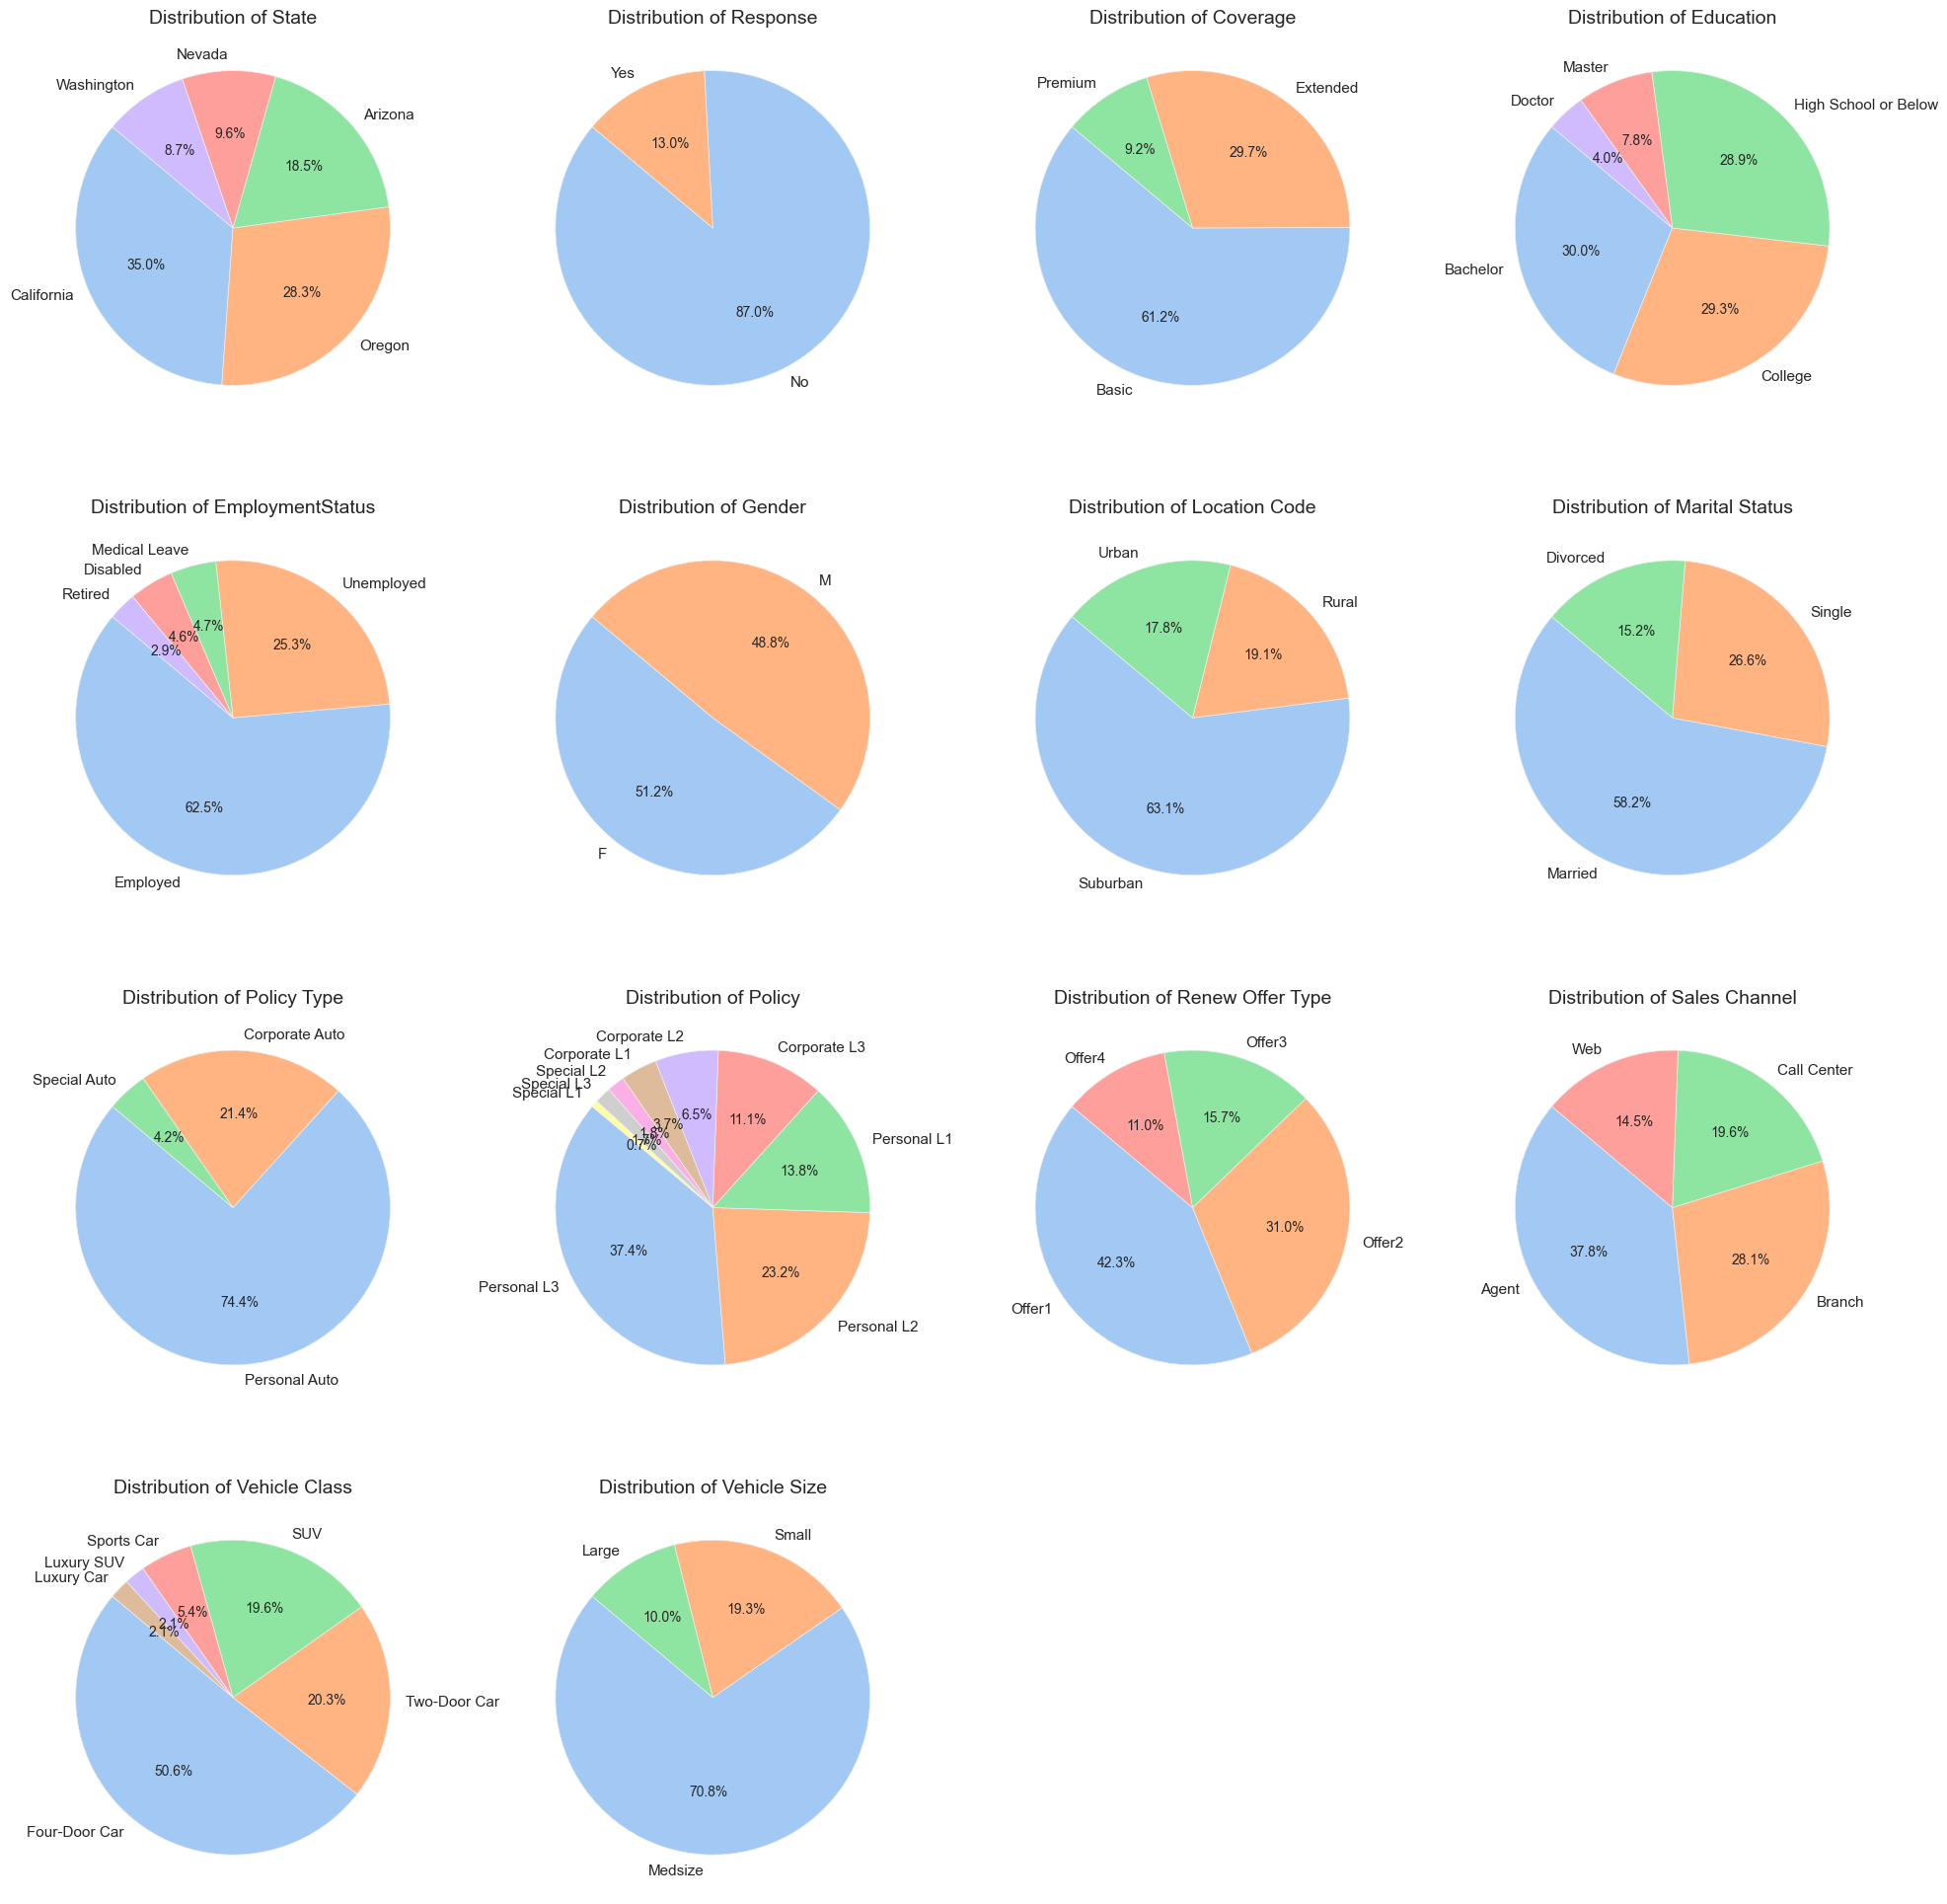

In [703]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    # Calculate the sum of Customer Lifetime Value for each category
    data = df[col].value_counts()
    
    # Plot pie chart
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    
    # Set title for each pie chart
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Scatterplots

In [704]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

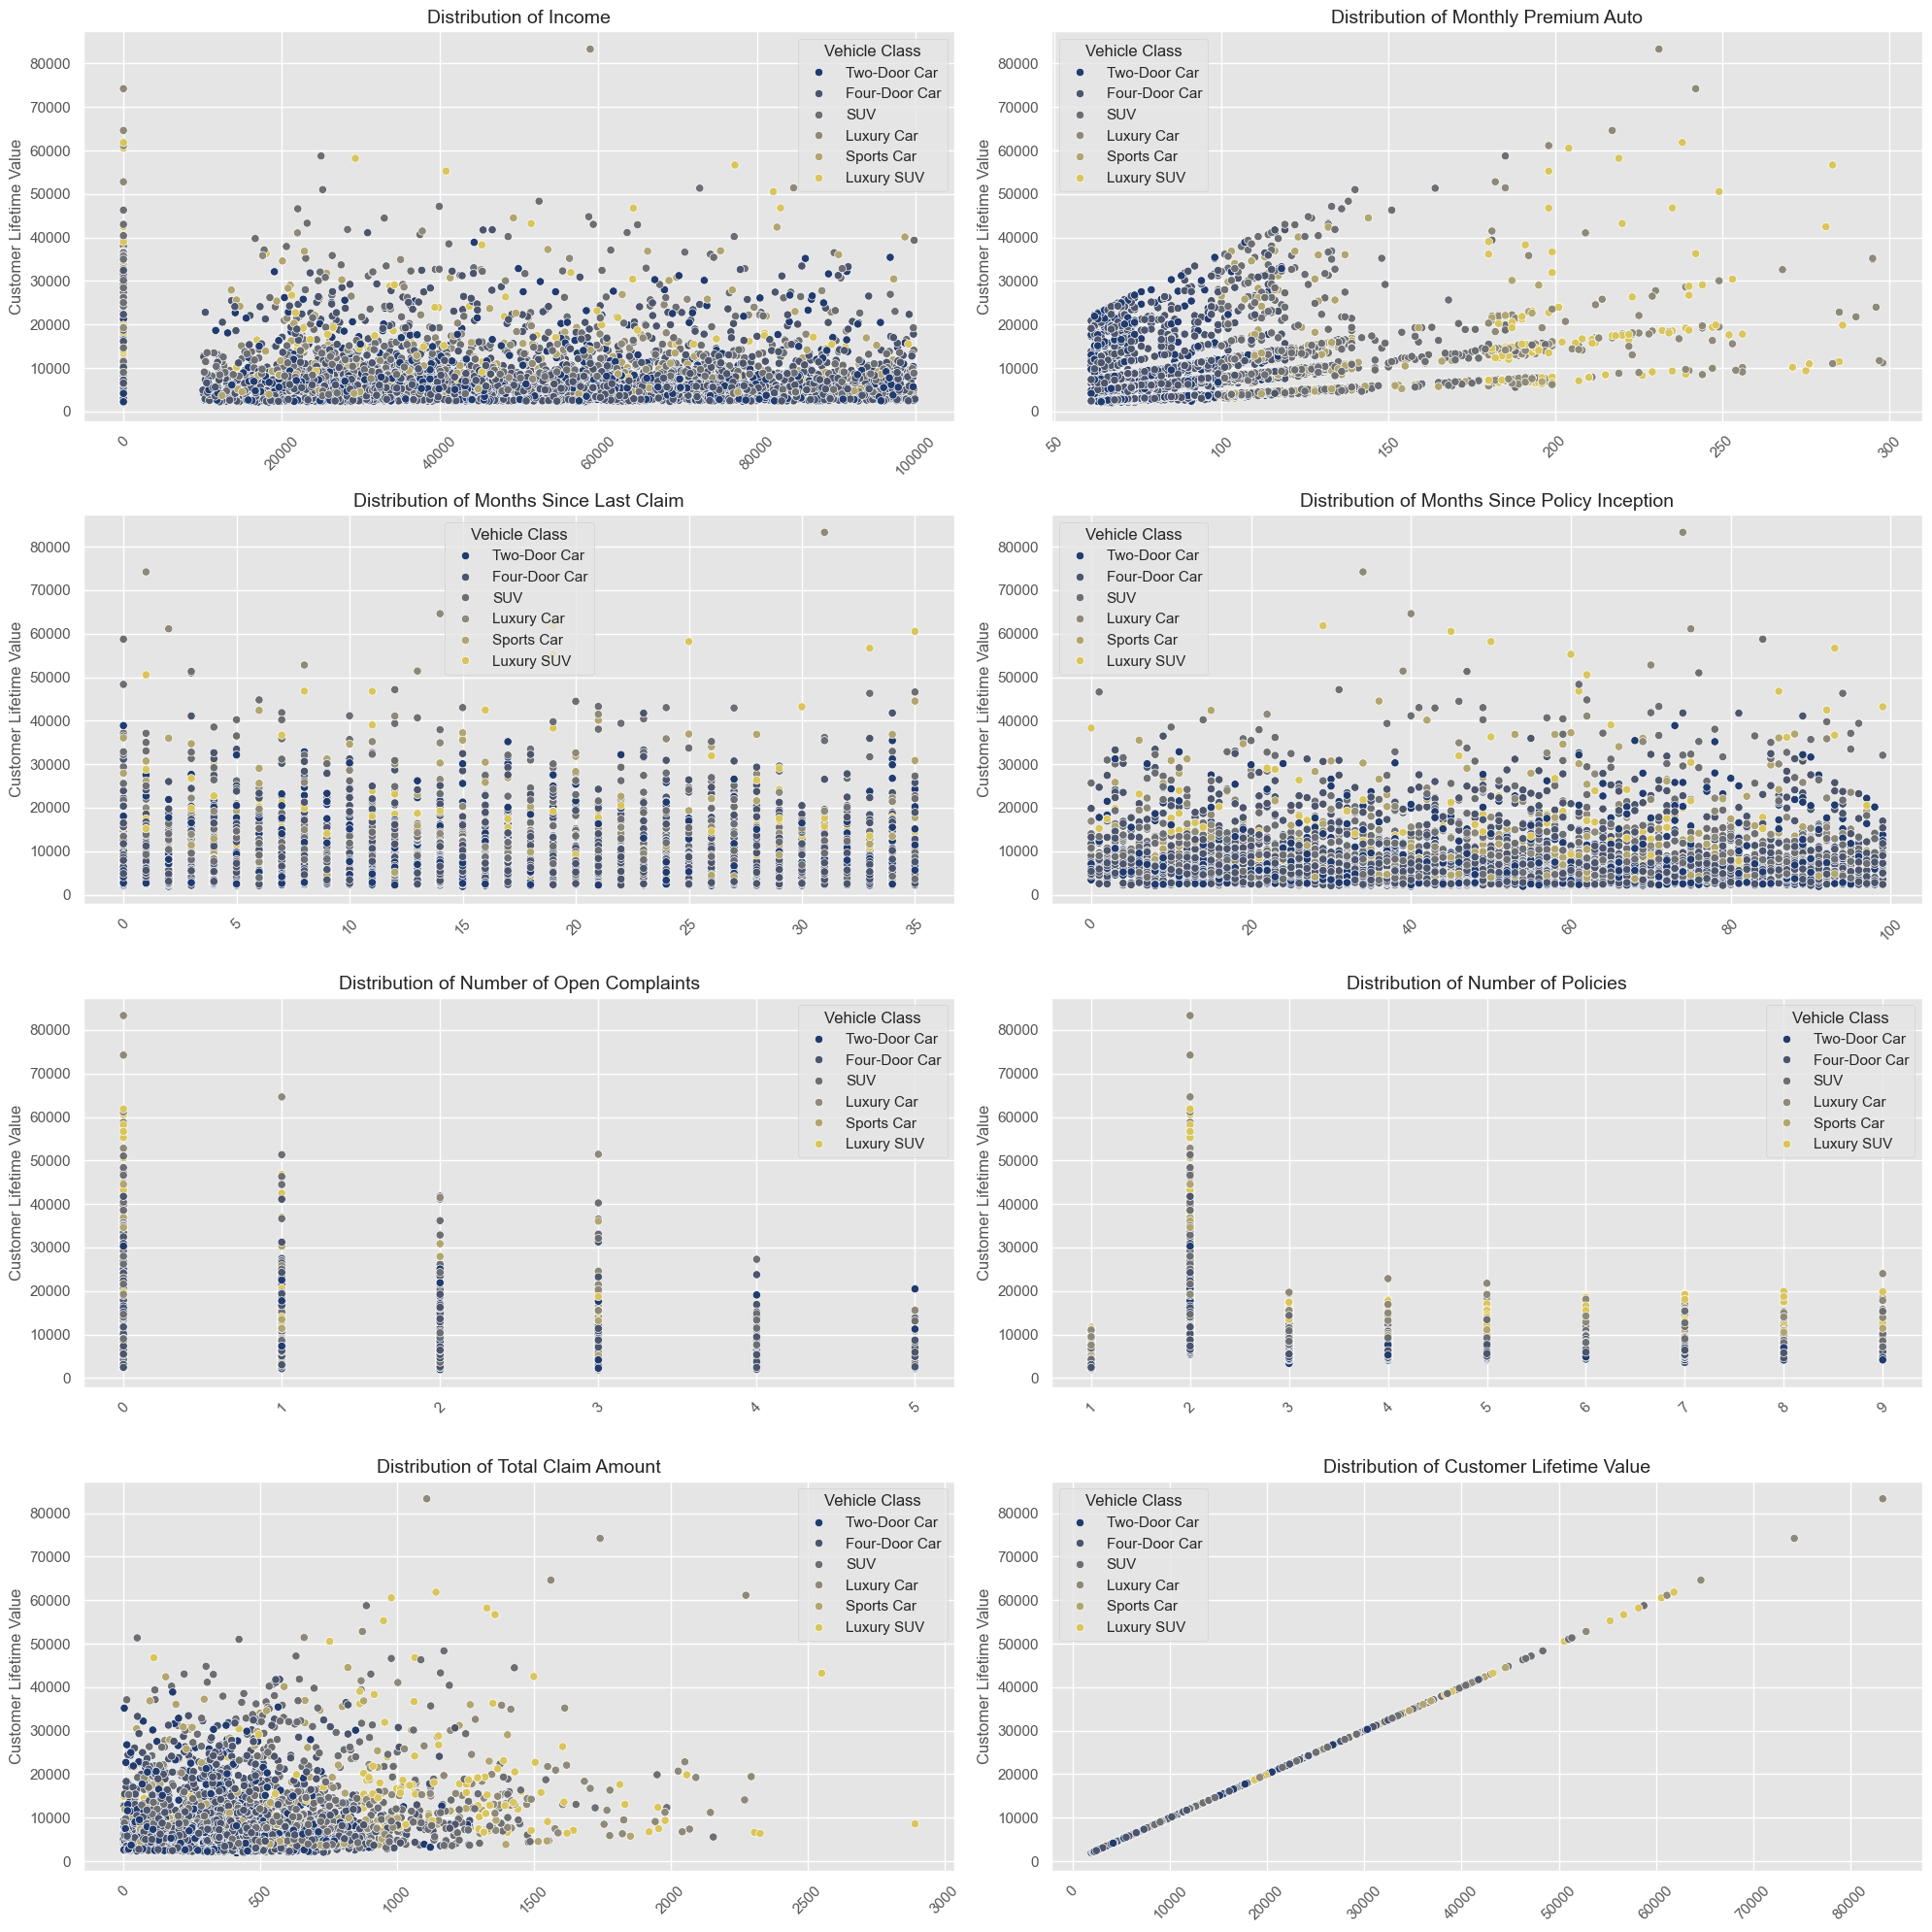

In [705]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()  

# Create a barplot for each numerical column
for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, 
                  y= 'Customer Lifetime Value',
                  data=df,
                  hue= 'Vehicle Class', 
                  palette='cividis',
                  ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='x', rotation=45) 

# Hide any unused subplots if there are less than 16 plots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## Heatmap Correlation

In [706]:
corr = df[num_cols].corr()

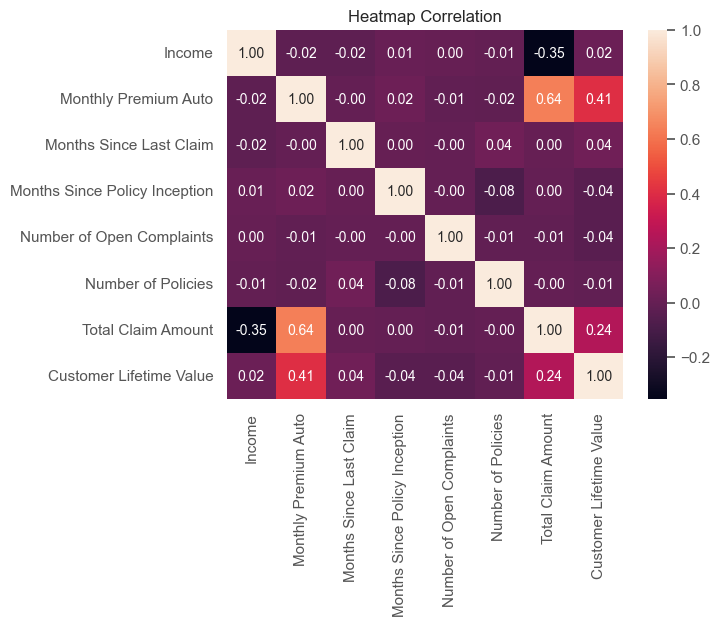

In [707]:
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap Correlation', size = 12)
plt.show()

---

# **Machine Learning Models**

## Feature Selection 

In [708]:
X = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

## Splitting 

In [709]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.2, 
    random_state= 42
)

## Scaling and Encoding

In [710]:
for col in cat_cols: 
    print(col, ': ', df[col].nunique())

State :  5
Response :  2
Coverage :  3
Education :  5
EmploymentStatus :  5
Gender :  2
Location Code :  3
Marital Status :  3
Policy Type :  3
Policy :  9
Renew Offer Type :  4
Sales Channel :  4
Vehicle Class :  6
Vehicle Size :  3


- One Hot Encoder : State, Response, Coverage, Gender, Location Code, Marital Status, Renew Offer Type, Sales Channel
- Ordinal Encoder : Education, Employment Status, Policy Type, Vehicle Class, Vehicle Size 
- Binary Encoder : Policy 

In [711]:
# Encoding features
onehot_enc = ['State', 'Response', 'Coverage', 'Gender', 'Location Code', 'Marital Status', 'Renew Offer Type', 'Sales Channel']
ordinal_enc = ['Education', 'EmploymentStatus', 'Policy Type', 'Policy', 'Vehicle Class', 'Vehicle Size'] 

In [712]:
for col in ordinal_enc: 
    print(col, ': ', df[col].unique())

Education :  ['Bachelor' 'College' 'High School or Below' 'Master' 'Doctor']
EmploymentStatus :  ['Employed' 'Unemployed' 'Retired' 'Disabled' 'Medical Leave']
Policy Type :  ['Personal Auto' 'Corporate Auto' 'Special Auto']
Policy :  ['Personal L3' 'Personal L1' 'Corporate L3' 'Corporate L2' 'Personal L2'
 'Special L2' 'Special L1' 'Corporate L1' 'Special L3']
Vehicle Class :  ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury Car' 'Sports Car'
 'Luxury SUV']
Vehicle Size :  ['Medsize' 'Small' 'Large']


In [713]:
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
employment_status_order = ['Unemployed', 'Medical Leave', 'Disabled', 'Retired', 'Employed']
policy_type_order = ['Personal Auto', 'Corporate Auto', 'Special Auto']
policy_order = ['Personal L1', 'Personal L2', 'Personal L3',
                'Corporate L1', 'Corporate L2', 'Corporate L3',
                'Special L1', 'Special L2', 'Special L3']
vehicle_class_order = ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car', 'Sports Car', 'Luxury SUV']
vehicle_size_order = ['Small', 'Medsize', 'Large']

In [714]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

In [715]:
# Scaling features
scaler_cols = num_cols.copy()
scaler_cols.remove('Customer Lifetime Value')
scaler_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [716]:
# Pipeline
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_enc), 
        ('ordinal', OrdinalEncoder(categories=[education_order, employment_status_order, policy_type_order, policy_order, vehicle_class_order, vehicle_size_order]), ordinal_enc),
        ('scaler', RobustScaler(), scaler_cols)
    ],
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['State', 'Response', 'Coverage', 'Gender',
                                  'Location Code', 'Marital Status',
                                  'Renew Offer Type', 'Sales Channel']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor'],
                                                            ['Unemployed',
                                                             'Medical Leave',
                                                             'Disabled',
                                                             'Retired',...
                                                            ['Two-Door Car',
                                                             'Four-Door Car',
                                                             'SUV',
                                                             'Luxury Car',
                                                             'Sports Car',
                                                             'Luxury SUV'],
                                                            ['Small', 'Medsize',
                                                             'Large']]),
                                 ['Education', 'EmploymentStatus',
                                  'Policy Type', 'Policy', 'Vehicle Class',
                                  'Vehicle Size']),
                                ('scaler', RobustScaler(),
                                 ['Income', 'Monthly Premium Auto',
                                  'Months Since Last Claim',
                                  'Months Since Policy Inception',
                                  'Number of Open Complaints',
                                  'Number of Policies',
                                  'Total Claim Amount'])])

In [717]:
x_transformed = transformer.fit_transform(X)
x_transformed

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         2.33333333, -0.58264706],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.33333333, -0.10442303],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         2.33333333, -0.40373336],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.33333333, -0.12182687],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.66666667,  2.4494904 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.02682646]])

In [718]:
transformed_columns = (
    transformer.named_transformers_['onehot'].get_feature_names_out(onehot_enc).tolist() +
    transformer.named_transformers_['ordinal'].get_feature_names_out(ordinal_enc).tolist() +
    scaler_cols 
)
x_transformed_df= pd.DataFrame(x_transformed, columns=transformed_columns)
x_transformed_df

State_California  State_Nevada  State_Oregon  State_Washington  \
0                  0.0           0.0           0.0               1.0   
1                  0.0           0.0           0.0               0.0   
2                  1.0           0.0           0.0               0.0   
3                  0.0           0.0           0.0               1.0   
4                  1.0           0.0           0.0               0.0   
...                ...           ...           ...               ...   
6783               0.0           0.0           1.0               0.0   
6784               1.0           0.0           0.0               0.0   
6785               1.0           0.0           0.0               0.0   
6786               1.0           0.0           0.0               0.0   
6787               0.0           0.0           0.0               0.0   

      Response_Yes  Coverage_Extended  Coverage_Premium  Gender_M  \
0              0.0                0.0               0.0       1.0   
1              0.0                0.0               0.0       1.0   
2              0.0                0.0               0.0       0.0   
3              0.0                0.0               0.0       0.0   
4              0.0                0.0               0.0       0.0   
...            ...                ...               ...       ...   
6783           0.0                0.0               0.0       0.0   
6784           0.0                0.0               0.0       0.0   
6785           1.0                0.0               0.0       1.0   
6786           0.0                1.0               0.0       0.0   
6787           1.0                1.0               0.0       0.0   

      Location Code_Suburban  Location Code_Urban  Marital Status_Married  \
0                        0.0                  1.0                     1.0   
1                        1.0                  0.0                     0.0   
2                        0.0                  1.0                     1.0   
3                        1.0                  0.0                     0.0   
4                        1.0                  0.0                     0.0   
...                      ...                  ...                     ...   
6783                     1.0                  0.0                     0.0   
6784                     1.0                  0.0                     0.0   
6785                     1.0                  0.0                     1.0   
6786                     1.0                  0.0                     0.0   
6787                     1.0                  0.0                     0.0   

      Marital Status_Single  Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      1.0   
3                       1.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
...                     ...                      ...                      ...   
6783                    1.0                      0.0                      0.0   
6784                    0.0                      0.0                      1.0   
6785                    0.0                      0.0                      0.0   
6786                    1.0                      0.0                      0.0   
6787                    0.0                      0.0                      0.0   

      Renew Offer Type_Offer4  Sales Channel_Branch  \
0                         0.0                   0.0   
1                         1.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   
...                       ...                   ...   
6783                      0.0

## Multiple Linear Regression

In [719]:
x_trans_linreg = sm.add_constant(x_transformed_df)

In [720]:
# OLS Models
sm_lm_ols = sm.OLS(y, x_trans_linreg)
result_ols = sm_lm_ols.fit()

In [721]:
print(result_ols.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.177
Model:                                 OLS   Adj. R-squared:                  0.173
Method:                      Least Squares   F-statistic:                     46.91
Date:                     Tue, 13 Aug 2024   Prob (F-statistic):          5.92e-258
Time:                             18:25:35   Log-Likelihood:                -68971.
No. Observations:                     6788   AIC:                         1.380e+05
Df Residuals:                         6756   BIC:                         1.382e+05
Df Model:                               31                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

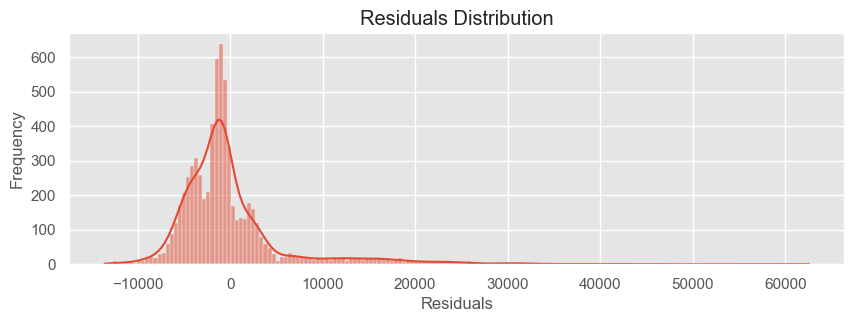

In [722]:
# Analisis Residual
residuals = result_ols.resid

# Plot residual
plt.figure(figsize=(10, 3))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

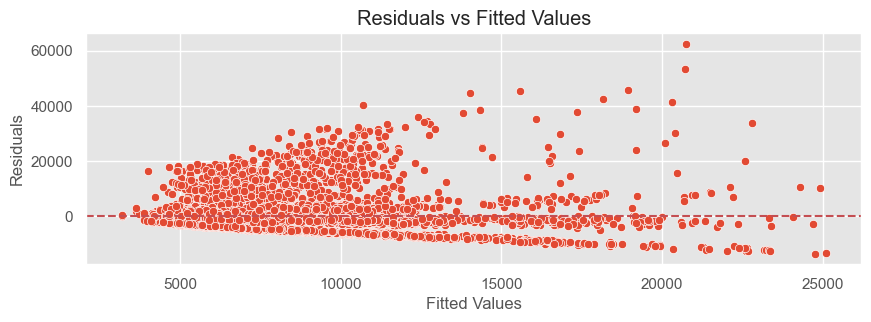

In [723]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 3))
sns.scatterplot(x=result_ols.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [633]:
# VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["feature"] = x_transformed_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_transformed_df, i) for i in range(x_transformed_df.shape[1])]

vif_data

feature        VIF
0                State_California   2.670568
1                    State_Nevada   1.456537
2                    State_Oregon   2.351804
3                State_Washington   1.408526
4                    Response_Yes   1.291671
5               Coverage_Extended   1.791399
6                Coverage_Premium   1.694293
7                        Gender_M   1.959536
8          Location Code_Suburban   7.807113
9             Location Code_Urban   2.110310
10         Marital Status_Married   4.421635
11          Marital Status_Single   2.586791
12        Renew Offer Type_Offer2   1.897773
13        Renew Offer Type_Offer3   1.417617
14        Renew Offer Type_Offer4   1.362556
15           Sales Channel_Branch   1.722685
16      Sales Channel_Call Center   1.518111
17              Sales Channel_Web   1.401349
18                      Education   2.383078
19               EmploymentStatus   9.080685
20                    Policy Type   6.927880
21                         Policy  12.997628
22                  Vehicle Class   5.906966
23                   Vehicle Size   3.662225
24                         Income   2.908931
25           Monthly Premium Auto   5.766627
26        Months Since Last Claim   1.020696
27  Months Since Policy Inception   1.018804
28      Number of Open Complaints   1.175014
29             Number of Policies   1.234832
30             Total Claim Amount   4.255672

In [634]:
# model prediction
y_pred = result_ols.predict(x_trans_linreg)

# Counting MAE, MAPE, R2, and Adjusted R2
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
r2 = r2_score(y, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x_trans_linreg.shape[1] - 1)
rmspe = np.sqrt(np.mean(np.square((y - y_pred) / y))) * 100

# showing the result
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'RMSPE: {rmspe}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')


MAE: 3863.6689191223154
MSE: 39179180.24548586
RMSE: 6259.327459518782
MAPE: 57.89312321783593
RMSPE: 78.67827476191842
R2: 0.1771190483160967
Adjusted R2: 0.1732208706027163


## Benchmark Model 

In [635]:
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Xtreme Gradient Boosting' : xgb.XGBRegressor()
}

### Model Evaluation and Comparison 

In [519]:
# Define the adjusted R² score class
class AdjustedR2Score:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
    def __call__(self, y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (self.n - 1) / (self.n - self.p - 1)
        return adjusted_r2
    
    def __name__(self):
        return 'adjusted_r2_score'

# Initialize the custom adjusted R2 scorer with the number of samples and features
n_samples, n_features = X_train.shape
adjusted_r2_scorer = AdjustedR2Score(n_samples, n_features)

# Create the scorer
adjusted_r2 = make_scorer(adjusted_r2_scorer, greater_is_better=True)

# Initialize lists to store results
results = []

# Perform cross-validation and store results
for model_name, model in models.items():
    # Timing start
    start_time = time.time()
    
    # Define pipeline
    pipeline = Pipeline(steps=[('transformer', transformer), 
                               ('regressor', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
    test_r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R2 on test set
    test_adj_r2 = adjusted_r2_scorer(y_test, y_pred)
    
    # Perform cross-validation
    cv_results = cross_validate(pipeline, 
                                X_train, 
                                y_train, 
                                cv=5, 
                                scoring={'MAPE': 'neg_mean_absolute_percentage_error', 
                                         'Adj_R2': adjusted_r2,
                                         'MAE': 'neg_mean_absolute_error',
                                         'MSE': 'neg_mean_squared_error',
                                         'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))},
                                return_train_score=False) 
    
    # Calculate scores
    train_mape = -cv_results['test_MAPE'].mean()
    train_adj_r2 = cv_results['test_Adj_R2'].mean()
    train_mae = -cv_results['test_MAE'].mean()
    train_mse = -cv_results['test_MSE'].mean()
    train_rmse = np.sqrt(-cv_results['test_RMSE'].mean())
    
    # Calculate average score difference
    avg_score_diff = train_mape - test_mape
    avg_adj_r2_diff = train_adj_r2 - test_adj_r2
    avg_mae_diff = train_mae - test_mae
    avg_mse_diff = train_mse - test_mse
    avg_rmse_diff = train_rmse - test_rmse
    
    # Calculate computation time
    computation_time = time.time() - start_time

    # Model Size 
    model_size = sys.getsizeof(pickle.dumps(pipeline)) / (1024 * 1024)
    
    # Append results
    results.append({
        'Model': model_name,
        'Train MAPE': train_mape,
        'Test MAPE': test_mape,
        'Difference MAPE': avg_score_diff,
        'Train Adj R2': train_adj_r2,
        'Test Adj R2': test_adj_r2,
        'Difference Adj R2': avg_adj_r2_diff,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Difference MAE': avg_mae_diff,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Difference MSE': avg_mse_diff,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Difference RMSE': avg_rmse_diff,
        'Computation Time (seconds)': computation_time,
        'Model Size (MB)': model_size
    })

# Create DataFrame from results
benchmark_model = pd.DataFrame(results).sort_values(by='Test MAPE', ascending=True).reset_index(drop=True)

benchmark_model


Model  Train MAPE  Test MAPE  Difference MAPE  \
0        Random Forest Regression    0.117038   0.111631         0.005407   
1        Decision Tree Regression    0.136597   0.119009         0.017588   
2    Gradient Boosting Regression    0.154811   0.148769         0.006042   
3        Xtreme Gradient Boosting    0.219561   0.215953         0.003607   
4                Lasso Regression    0.580893   0.589949        -0.009056   
5                Ridge Regression    0.580989   0.590025        -0.009036   
6  K-Nearest Neighbors Regression    0.608761   0.604668         0.004093   

   Train Adj R2  Test Adj R2  Difference Adj R2    Train MAE     Test MAE  \
0      0.689998     0.682473           0.007524  1591.224275  1594.512520   
1      0.414950     0.544782          -0.129832  1859.504295  1643.151187   
2      0.664374     0.664979          -0.000604  1845.627668  1874.330007   
3      0.648151     0.623369           0.024782  2057.767620  2105.464438   
4      0.160630     0.168240          -0.007610  3867.962541  3985.716520   
5      0.160418     0.168112          -0.007694  3868.634574  3986.458363   
6      0.069911     0.072949          -0.003038  4075.235802  4174.316449   

   Difference MAE     Train MSE      Test MSE  Difference MSE  Train RMSE  \
0       -3.288244  1.441550e+07  1.602538e+07   -1.609873e+06         NaN   
1      216.353107  2.725075e+07  2.297460e+07    4.276154e+06         NaN   
2      -28.702339  1.563824e+07  1.690833e+07   -1.270094e+06         NaN   
3      -47.696817  1.631928e+07  1.900835e+07   -2.689075e+06         NaN   
4     -117.753979  3.911060e+07  4.197842e+07   -2.867815e+06         NaN   
5     -117.823789  3.912065e+07  4.198488e+07   -2.864231e+06         NaN   
6      -99.080646  4.340559e+07  4.678773e+07   -3.382149e+06         NaN   

     Test RMSE  Difference RMSE  Computation Time (seconds)  Model Size (MB)  
0  4003.170781              NaN                   23.672806        44.466862  
1  4793.182378              NaN                    0.806901         0.693110  
2  4111.974527              NaN                    6.933015         0.138431  
3  4359.856965              NaN                    1.174046         0.413277  
4  6479.075349              NaN                    0.269331         0.004451  
5  6479.574210              NaN                    0.334664         0.004365  
6  6840.156034              NaN                    0.452034         1.329926

In [520]:
np.sqrt(-cv_results['test_RMSE'].mean())

nan

In [521]:
# Define param_distributions for RandomizedSearchCV with expanded parameters
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 500, 1000, 1500],
    'regressor__max_depth': [None, 10, 20, 30, 50, 70, 100],
    'regressor__min_samples_split': [2, 5, 10, 15, 20],
    'regressor__min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__bootstrap': [True, False],
    'regressor__max_samples': [None, 0.5, 0.7, 0.9],
    'regressor__min_impurity_decrease': [0.0, 0.01, 0.1],
    'regressor__ccp_alpha': [0.0, 0.01, 0.1],
    'regressor__random_state': [2020, 42, 0],
}

# Create pipeline
pipe_rf = Pipeline(steps=[('transformer', transformer), 
                           ('regressor', RandomForestRegressor(random_state=42))])

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_rf = RandomizedSearchCV(pipe_rf, 
                               param_distributions=param_distributions, 
                               n_iter=100,  # Number of parameter settings that are sampled
                               cv=kf, 
                               scoring='neg_mean_absolute_percentage_error', 
                               n_jobs=-1, 
                               verbose=2, 
                               random_state=42)

random_rf.fit(X_train, y_train)

# Evaluate the best model
best_model = random_rf.best_estimator_
y_pred_rf = best_model.predict(X_test)

# Calculate metrics
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
rmspe_rf = np.sqrt(np.mean(np.square((y_test - y_pred_rf) / y_test))) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# Best parameters
print("Best parameters:", random_rf.best_params_)
print(f"MAPE: {mape_rf}")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"RMSPE: {rmspe_rf}")
print(f"R-squared: {r2_rf}")

# Calculate Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2_rf}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'regressor__random_state': 0, 'regressor__n_estimators': 1500, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_impurity_decrease': 0.1, 'regressor__max_samples': 0.9, 'regressor__max_features': None, 'regressor__max_depth': 30, 'regressor__ccp_alpha': 0.0, 'regressor__bootstrap': True}
MAPE: 0.11195688360744782
MAE: 1618.6372842649287
MSE: 15524909.416025277
RMSE: 3940.1661660424015
RMSPE: 22.056493191758374
R-squared: 0.6935795775861574
Adjusted R-squared: 0.6887630889104908


## Best Model


In [724]:
best_model = random_rf.best_estimator_
best_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['State', 'Response',
                                                   'Coverage', 'Gender',
                                                   'Location Code',
                                                   'Marital Status',
                                                   'Renew Offer Type',
                                                   'Sales Channel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School '
                                                                              'or '
                                                                              'Below',
                                                                              'College',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Doctor'],
                                                                             ['Unemployed',
                                                                              '...
                                                 ('scaler', RobustScaler(),
                                                  ['Income',
                                                   'Monthly Premium Auto',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'Number of Open Complaints',
                                                   'Number of Policies',
                                                   'Total Claim Amount'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       max_samples=0.9,
                                       min_impurity_decrease=0.1,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=1500, random_state=0))])

### Comparison

## Feature Importance

In [725]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features: 
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington',
 'Response_Yes',
 'Coverage_Extended',
 'Coverage_Premium',
 'Gender_M',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Marital Status_Married',
 'Marital Status_Single',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Sales Channel_Branch',
 'Sales Channel_Call Center',
 'Sales Channel_Web',
 'Education',
 'EmploymentStatus',
 'Policy Type',
 'Policy',
 'Vehicle Class',
 'Vehicle Size',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [726]:
# assign feature importance to variable 

imp = best_model[-1].feature_importances_
imp

array([0.00364266, 0.00150246, 0.00299306, 0.00087174, 0.00342413,
       0.00149125, 0.00172737, 0.00604098, 0.00088136, 0.00183302,
       0.00446099, 0.00275778, 0.00500078, 0.00213974, 0.00238869,
       0.00364975, 0.00226344, 0.00185378, 0.0098937 , 0.00491055,
       0.00104118, 0.00792843, 0.00975259, 0.00321487, 0.02544511,
       0.27490292, 0.03591913, 0.02905856, 0.00355584, 0.51458028,
       0.03087387])

In [727]:
# to dataframe 
feature_imp = pd.DataFrame({
    'Feature': list_features, 
    'Importance': imp, 
}).sort_values(by='Importance', ascending=False)
feature_imp

Feature  Importance
29             Number of Policies    0.514580
25           Monthly Premium Auto    0.274903
26        Months Since Last Claim    0.035919
30             Total Claim Amount    0.030874
27  Months Since Policy Inception    0.029059
24                         Income    0.025445
18                      Education    0.009894
22                  Vehicle Class    0.009753
21                         Policy    0.007928
7                        Gender_M    0.006041
12        Renew Offer Type_Offer2    0.005001
19               EmploymentStatus    0.004911
10         Marital Status_Married    0.004461
15           Sales Channel_Branch    0.003650
0                State_California    0.003643
28      Number of Open Complaints    0.003556
4                    Response_Yes    0.003424
23                   Vehicle Size    0.003215
2                    State_Oregon    0.002993
11          Marital Status_Single    0.002758
14        Renew Offer Type_Offer4    0.002389
16      Sales Channel_Call Center    0.002263
13        Renew Offer Type_Offer3    0.002140
17              Sales Channel_Web    0.001854
9             Location Code_Urban    0.001833
6                Coverage_Premium    0.001727
1                    State_Nevada    0.001502
5               Coverage_Extended    0.001491
20                    Policy Type    0.001041
8          Location Code_Suburban    0.000881
3                State_Washington    0.000872

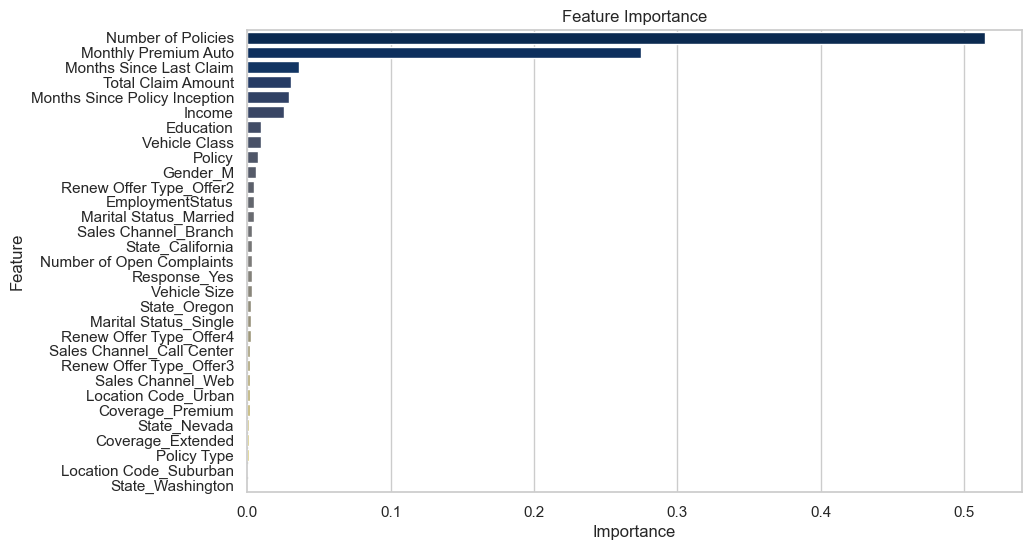

In [728]:
# Visualization 

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'cividis')
plt.title('Feature Importance')
plt.show()

---

# **Clustering**

In [729]:
# Pipeline
pipe_clustering = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_enc), 
        ('ordinal', OrdinalEncoder(categories=[education_order, employment_status_order, policy_type_order, policy_order, vehicle_class_order, vehicle_size_order]), ordinal_enc),
        ('scaler', RobustScaler(), num_cols)
    ],
    remainder='passthrough'
)
pipe_clustering

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['State', 'Response', 'Coverage', 'Gender',
                                  'Location Code', 'Marital Status',
                                  'Renew Offer Type', 'Sales Channel']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor'],
                                                            ['Unemployed',
                                                             'Medical Leave',
                                                             'Disabled',
                                                             'Retired',...
                                                             'Luxury Car',
                                                             'Sports Car',
                                                             'Luxury SUV'],
                                                            ['Small', 'Medsize',
                                                             'Large']]),
                                 ['Education', 'EmploymentStatus',
                                  'Policy Type', 'Policy', 'Vehicle Class',
                                  'Vehicle Size']),
                                ('scaler', RobustScaler(),
                                 ['Income', 'Monthly Premium Auto',
                                  'Months Since Last Claim',
                                  'Months Since Policy Inception',
                                  'Number of Open Complaints',
                                  'Number of Policies', 'Total Claim Amount',
                                  'Customer Lifetime Value'])])

In [730]:
x_cluster = pipe_clustering.fit_transform(df)
x_cluster

array([[ 0.        ,  0.        ,  0.        , ...,  2.33333333,
        -0.58264706, -0.29911219],
       [ 0.        ,  0.        ,  0.        , ..., -0.33333333,
        -0.10442303, -0.68197429],
       [ 1.        ,  0.        ,  0.        , ...,  2.33333333,
        -0.40373336, -0.22293658],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.33333333,
        -0.12182687, -0.14853359],
       [ 1.        ,  0.        ,  0.        , ...,  1.66666667,
         2.4494904 ,  0.57216269],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.02682646,  1.73611262]])

In [731]:
transformed_columns = (
    transformer.named_transformers_['onehot'].get_feature_names_out(onehot_enc).tolist() +
    transformer.named_transformers_['ordinal'].get_feature_names_out(ordinal_enc).tolist() +
    num_cols 
)
df_clustering = pd.DataFrame(x_cluster, columns=transformed_columns)
df_clustering

State_California  State_Nevada  State_Oregon  State_Washington  \
0                  0.0           0.0           0.0               1.0   
1                  0.0           0.0           0.0               0.0   
2                  1.0           0.0           0.0               0.0   
3                  0.0           0.0           0.0               1.0   
4                  1.0           0.0           0.0               0.0   
...                ...           ...           ...               ...   
6783               0.0           0.0           1.0               0.0   
6784               1.0           0.0           0.0               0.0   
6785               1.0           0.0           0.0               0.0   
6786               1.0           0.0           0.0               0.0   
6787               0.0           0.0           0.0               0.0   

      Response_Yes  Coverage_Extended  Coverage_Premium  Gender_M  \
0              0.0                0.0               0.0       1.0   
1              0.0                0.0               0.0       1.0   
2              0.0                0.0               0.0       0.0   
3              0.0                0.0               0.0       0.0   
4              0.0                0.0               0.0       0.0   
...            ...                ...               ...       ...   
6783           0.0                0.0               0.0       0.0   
6784           0.0                0.0               0.0       0.0   
6785           1.0                0.0               0.0       1.0   
6786           0.0                1.0               0.0       0.0   
6787           1.0                1.0               0.0       0.0   

      Location Code_Suburban  Location Code_Urban  Marital Status_Married  \
0                        0.0                  1.0                     1.0   
1                        1.0                  0.0                     0.0   
2                        0.0                  1.0                     1.0   
3                        1.0                  0.0                     0.0   
4                        1.0                  0.0                     0.0   
...                      ...                  ...                     ...   
6783                     1.0                  0.0                     0.0   
6784                     1.0                  0.0                     0.0   
6785                     1.0                  0.0                     1.0   
6786                     1.0                  0.0                     0.0   
6787                     1.0                  0.0                     0.0   

      Marital Status_Single  Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      1.0   
3                       1.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
...                     ...                      ...                      ...   
6783                    1.0                      0.0                      0.0   
6784                    0.0                      0.0                      1.0   
6785                    0.0                      0.0                      0.0   
6786                    1.0                      0.0                      0.0   
6787                    0.0                      0.0                      0.0   

      Renew Offer Type_Offer4  Sales Channel_Branch  \
0                         0.0                   0.0   
1                         1.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   
...                       ...                   ...   
6783                      0.0

In [732]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


In [733]:
# optimize silhoutte score 
silhouette_scores=[]
number_of_cluster= range(2,11)

for i in number_of_cluster: 
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_clustering, labels, metric = 'euclidean'))
    

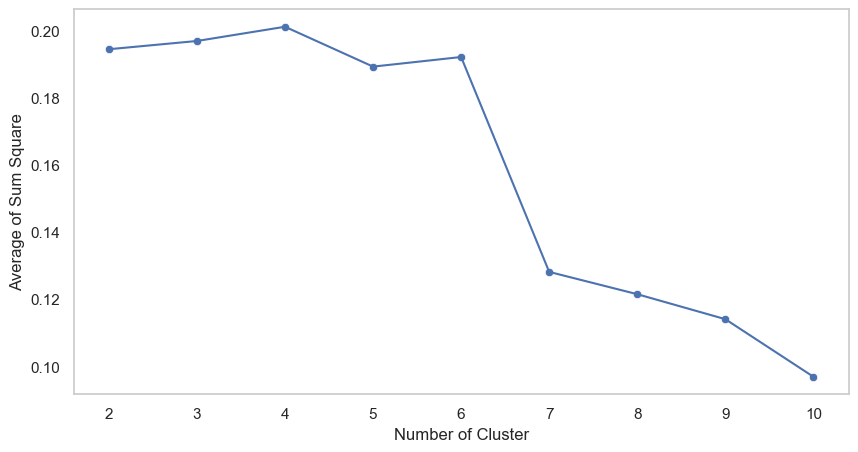

In [734]:
# visualizations 
plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1)

sns.scatterplot(x=number_of_cluster, y=silhouette_scores)
sns.lineplot(x=number_of_cluster, y=silhouette_scores)

plt.xlabel('Number of Cluster')
plt.ylabel('Average of Sum Square')
plt.grid()
plt.show()

## Applying K-Means Clustering

In [735]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_clustering)

KMeans(n_clusters=4, random_state=42)

In [736]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_clustering)

In [737]:
predict = kmeans.fit_predict(df_clustering)

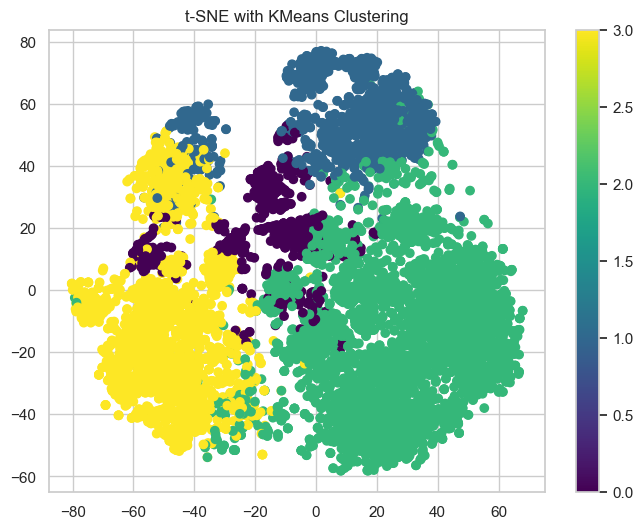

In [738]:
# Plotting

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predict, cmap='viridis')
plt.colorbar()
plt.title('t-SNE with KMeans Clustering')

plt.show()

In [739]:
df_clustering['cluster'] = kmeans.labels_
df_clustering

State_California  State_Nevada  State_Oregon  State_Washington  \
0                  0.0           0.0           0.0               1.0   
1                  0.0           0.0           0.0               0.0   
2                  1.0           0.0           0.0               0.0   
3                  0.0           0.0           0.0               1.0   
4                  1.0           0.0           0.0               0.0   
...                ...           ...           ...               ...   
6783               0.0           0.0           1.0               0.0   
6784               1.0           0.0           0.0               0.0   
6785               1.0           0.0           0.0               0.0   
6786               1.0           0.0           0.0               0.0   
6787               0.0           0.0           0.0               0.0   

      Response_Yes  Coverage_Extended  Coverage_Premium  Gender_M  \
0              0.0                0.0               0.0       1.0   
1              0.0                0.0               0.0       1.0   
2              0.0                0.0               0.0       0.0   
3              0.0                0.0               0.0       0.0   
4              0.0                0.0               0.0       0.0   
...            ...                ...               ...       ...   
6783           0.0                0.0               0.0       0.0   
6784           0.0                0.0               0.0       0.0   
6785           1.0                0.0               0.0       1.0   
6786           0.0                1.0               0.0       0.0   
6787           1.0                1.0               0.0       0.0   

      Location Code_Suburban  Location Code_Urban  Marital Status_Married  \
0                        0.0                  1.0                     1.0   
1                        1.0                  0.0                     0.0   
2                        0.0                  1.0                     1.0   
3                        1.0                  0.0                     0.0   
4                        1.0                  0.0                     0.0   
...                      ...                  ...                     ...   
6783                     1.0                  0.0                     0.0   
6784                     1.0                  0.0                     0.0   
6785                     1.0                  0.0                     1.0   
6786                     1.0                  0.0                     0.0   
6787                     1.0                  0.0                     0.0   

      Marital Status_Single  Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      1.0   
3                       1.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
...                     ...                      ...                      ...   
6783                    1.0                      0.0                      0.0   
6784                    0.0                      0.0                      1.0   
6785                    0.0                      0.0                      0.0   
6786                    1.0                      0.0                      0.0   
6787                    0.0                      0.0                      0.0   

      Renew Offer Type_Offer4  Sales Channel_Branch  \
0                         0.0                   0.0   
1                         1.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   
...                       ...                   ...   
6783                      0.0

In [740]:
df_clustering['cluster'].value_counts()

cluster
2    3218
3    1899
1    1110
0     561
Name: count, dtype: int64

In [741]:
df_clustering.groupby('cluster')['Customer Lifetime Value'].mean()

cluster
0    3.337777
1    0.259586
2    0.165046
3    0.118342
Name: Customer Lifetime Value, dtype: float64

In [742]:
df['cluster'] = df_clustering['cluster']
df

State Response  Coverage             Education EmploymentStatus  \
0     Washington       No     Basic              Bachelor         Employed   
1        Arizona       No     Basic               College         Employed   
2     California       No     Basic              Bachelor         Employed   
3     Washington       No     Basic              Bachelor         Employed   
4     California       No     Basic               College         Employed   
...          ...      ...       ...                   ...              ...   
6783      Oregon       No     Basic               College         Disabled   
6784  California       No     Basic               College         Employed   
6785  California      Yes     Basic               College    Medical Leave   
6786  California       No  Extended  High School or Below       Unemployed   
6787     Arizona      Yes  Extended              Bachelor       Unemployed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
0         M   51144         Urban        Married                    61   
1         M   81097      Suburban       Divorced                    74   
2         F   72264         Urban        Married                    64   
3         F   54737      Suburban         Single                    66   
4         F   38898      Suburban       Divorced                   117   
...     ...     ...           ...            ...                   ...   
6783      F   12180      Suburban         Single                   113   
6784      F   87957      Suburban       Divorced                    61   
6785      M   22520      Suburban        Married                    73   
6786      F       0      Suburban         Single                   129   
6787      F       0      Suburban       Divorced                   139   

      Months Since Last Claim  Months Since Policy Inception  \
0                          28                             32   
1                           7                             67   
2                           2                             66   
3                           3                             86   
4                          26                             68   
...                       ...                            ...   
6783                       17                             62   
6784                       31                             63   
6785                       17                             64   
6786                       13                              4   
6787                        5                             56   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             1                   9   Personal Auto   
1                             0                   1   Personal Auto   
2                             0                   9  Corporate Auto   
3                             0                   1   Personal Auto   
4                             0                   3  Corporate Auto   
...                         ...                 ...             ...   
6783                          0                   3  Corporate Auto   
6784                          0                   2   Personal Auto   
6785                          0                   3   Personal Auto   
6786                          0                   7   Personal Auto   
6787                          0                   2   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0      Personal L3           Offer1         Agent          223.305224   
1      Personal L1           Offer4         Agent          355.200000   
2     Corporate L3           Offer3           Web          272.649844   
3      Personal L3           Offer3           Web          391.970334   
4     Corporate L2           Offer1         Agent          561.600000   
...            ...              ...           ...                 ...   
6783  Corporate L3           Offer1         Agent   

In [743]:
df.groupby('cluster')['Customer Lifetime Value'].mean()


cluster
0    22400.103510
1     7477.447392
2     7019.130808
3     6792.719592
Name: Customer Lifetime Value, dtype: float64

In [744]:
df['cluster'].value_counts()

cluster
2    3218
3    1899
1    1110
0     561
Name: count, dtype: int64

In [745]:
df_avg_clv = pd.DataFrame({
    'Count' : df['cluster'].value_counts(),
    'AVG CLV' : df.groupby('cluster')['Customer Lifetime Value'].mean()
})
df_avg_clv

Count       AVG CLV
cluster                     
0          561  22400.103510
1         1110   7477.447392
2         3218   7019.130808
3         1899   6792.719592

In [746]:
df_avg_clv.sort_values(by='AVG CLV', ascending=False)

Count       AVG CLV
cluster                     
0          561  22400.103510
1         1110   7477.447392
2         3218   7019.130808
3         1899   6792.719592

In [747]:
df[df['cluster'] == 0]

State Response  Coverage             Education EmploymentStatus  \
10        Nevada       No  Extended              Bachelor         Employed   
25        Oregon       No     Basic  High School or Below         Employed   
44        Oregon       No   Premium              Bachelor         Employed   
47    California       No   Premium               College       Unemployed   
51    California      Yes  Extended               College          Retired   
...          ...      ...       ...                   ...              ...   
6719  California       No     Basic              Bachelor       Unemployed   
6725  California       No  Extended               College         Employed   
6730  California       No     Basic              Bachelor          Retired   
6765  California       No     Basic              Bachelor       Unemployed   
6771  Washington       No     Basic  High School or Below         Employed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
10        F   39411      Suburban        Married                   217   
25        M   93011         Rural       Divorced                   113   
44        F   46268         Urban        Married                   199   
47        F       0      Suburban         Single                   190   
51        F   13663      Suburban         Single                    97   
...     ...     ...           ...            ...                   ...   
6719      M       0      Suburban         Single                   196   
6725      F   67117         Urban         Single                    85   
6730      M   23909      Suburban         Single                   119   
6765      M       0      Suburban       Divorced                   110   
6771      F   90783         Urban       Divorced                   104   

      Months Since Last Claim  Months Since Policy Inception  \
10                          4                             29   
25                         17                             12   
44                         34                             17   
47                         21                             35   
51                          1                             66   
...                       ...                            ...   
6719                       31                             78   
6725                       10                             38   
6730                       21                             86   
6765                        1                             53   
6771                        0                             38   

      Number of Open Complaints  Number of Policies     Policy Type  \
10                            2                   4   Personal Auto   
25                            0                   2   Personal Auto   
44                            1                   2   Personal Auto   
47                            1                   7   Personal Auto   
51                            0                   2   Personal Auto   
...                         ...                 ...             ...   
6719                          0                   2  Corporate Auto   
6725                          0                   2   Personal Auto   
6730                          0                   2   Personal Auto   
6765                          1                   2  Corporate Auto   
6771                          2                   2   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
10     Personal L3           Offer3        Branch         1122.658899   
25     Personal L3           Offer4         Agent          281.451042   
44     Personal L3           Offer1         Agent          842.000858   
47     Personal L3           Offer3        Branch         1654.202174   
51     Personal L2           Offer1        Branch          465.600000   
...            ...              ...           ...                 ...   
6719  Corporate L1           Offer2   Call Center   

> `Our focus will be on the data in cluster 0 because it has the least amount of data (565 rows), but the average customer lifetime value is very high (22312.32)`

In [748]:
df[df['cluster'] == 0].describe().T

count          mean           std          min  \
Income                         561.0  36550.907308  28288.477260     0.000000   
Monthly Premium Auto           561.0    165.907308     52.369245    70.000000   
Months Since Last Claim        561.0     15.326203     10.360752     0.000000   
Months Since Policy Inception  561.0     50.575758     27.724829     0.000000   
Number of Open Complaints      561.0      0.349376      0.834012     0.000000   
Number of Policies             561.0      2.778966      2.020693     1.000000   
Total Claim Amount             561.0    879.966406    481.503676     1.587888   
Customer Lifetime Value        561.0  22400.103510  11860.108278  5745.416630   
cluster                        561.0      0.000000      0.000000     0.000000   

                                      25%          50%           75%  \
Income                         15999.0000  33635.00000  58414.000000   
Monthly Premium Auto             115.0000    180.00000    199.000000   
Months Since Last Claim            6.0000     15.00000     24.000000   
Months Since Policy Inception     28.0000     51.00000     74.000000   
Number of Open Complaints          0.0000      0.00000      0.000000   
Number of Policies                 2.0000      2.00000      3.000000   
Total Claim Amount               523.2000    859.20000   1210.920949   
Customer Lifetime Value        13736.1325  19685.40911  30118.655400   
cluster                            0.0000      0.00000      0.000000   

                                        max  
Income                         99875.000000  
Monthly Premium Auto             298.000000  
Months Since Last Claim           35.000000  
Months Since Policy Inception     99.000000  
Number of Open Complaints          5.000000  
Number of Policies                 9.000000  
Total Claim Amount              2893.239678  
Customer Lifetime Value        83325.381190  
cluster                            0.000000

In [749]:
df['Customer Lifetime Value'].max()

83325.38119

In [750]:
df['Customer Lifetime Value'].min()

1898.007675

## EDA After Clustering 

In [751]:
cluste_ratio = df['cluster'].value_counts().reset_index()
cluste_ratio

cluster  count
0        2   3218
1        3   1899
2        1   1110
3        0    561

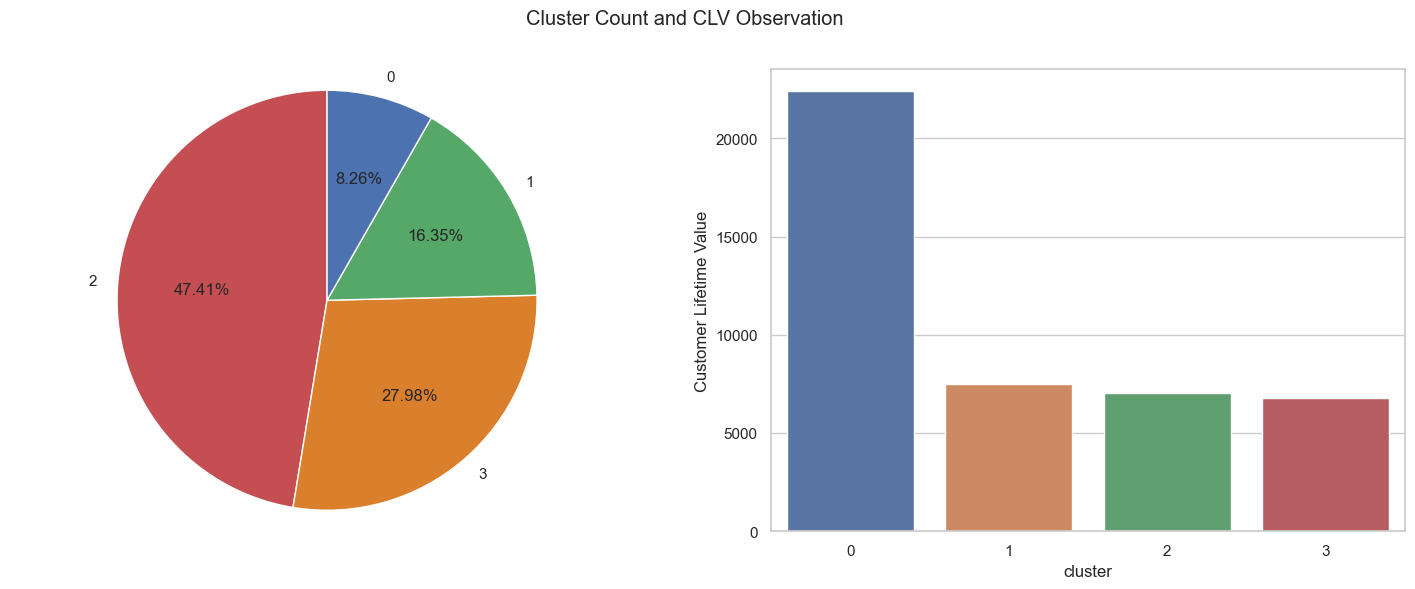

In [752]:
figure, axes = plt.subplots(1,2, figsize=(18,6))
figure.suptitle('Cluster Count and CLV Observation')
axes[0].pie(x=cluste_ratio['count'], 
        labels=cluste_ratio['cluster'], 
        startangle= 90, 
        counterclock=True, 
        autopct='%.2f%%',
        colors= ['#c44e52','#da7f2c','#55a868', '#4c72b0' ])
axes[0].axis('Equal')
sns.barplot(data=df, 
            x='cluster', 
            y= 'Customer Lifetime Value', 
            ci = None, 
            palette= 'deep',
            ax=axes[1])

plt.show()

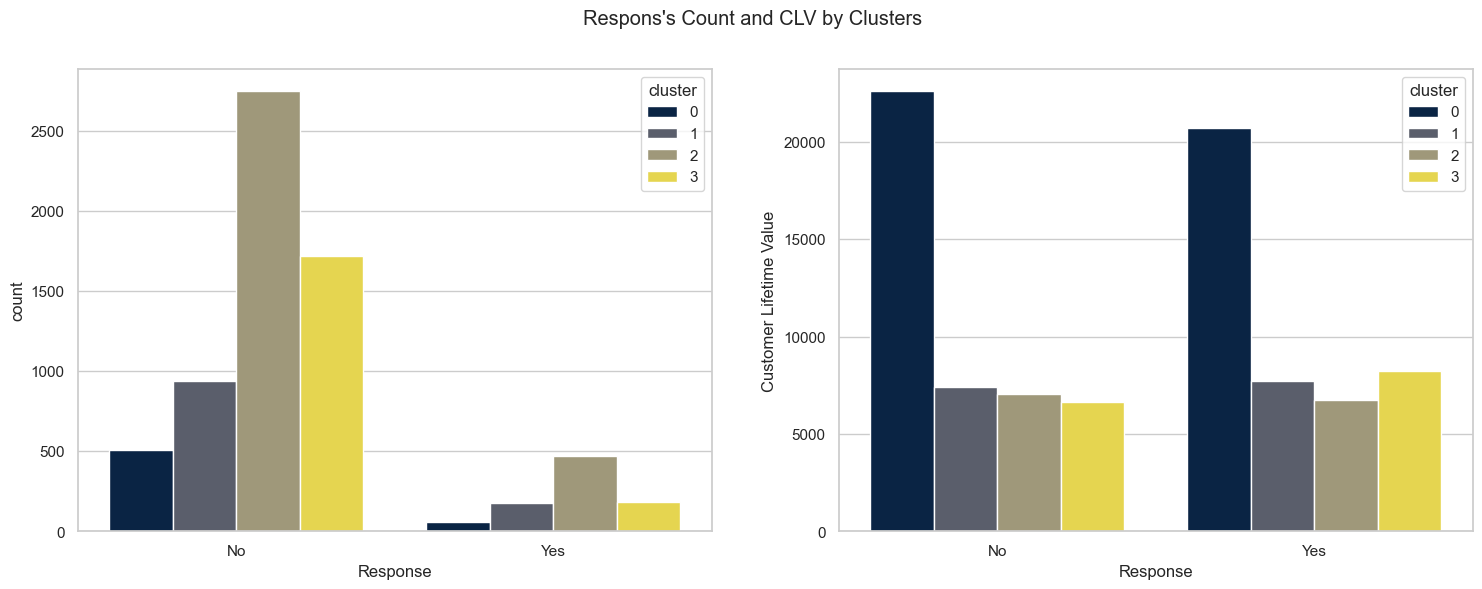

In [753]:
figure, axes = plt.subplots(1, 2,  figsize=(18,6))
figure.suptitle("Respons's Count and CLV by Clusters")

sns.barplot(data=df,
            x = 'Response', 
            y = 'Customer Lifetime Value', 
            hue = 'cluster', 
            ci=None, 
            palette='cividis', 
            ax= axes[1] )
sns.countplot(data=df,
            x = 'Response', 
            hue = 'cluster',
            palette='cividis',
            ax=axes[0] )


plt.show()

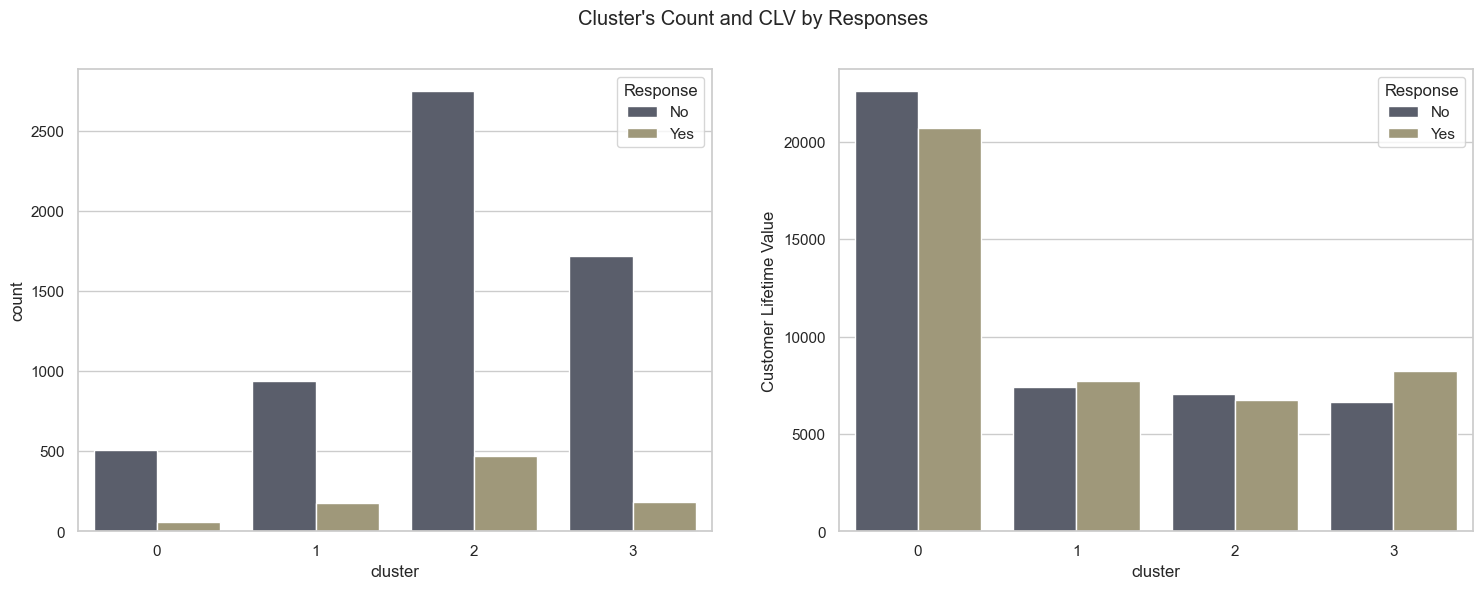

In [754]:
figure, axes = plt.subplots(1, 2,  figsize=(18,6))
figure.suptitle("Cluster's Count and CLV by Responses")

sns.barplot(data=df,
            x = 'cluster', 
            y = 'Customer Lifetime Value', 
            hue = 'Response', 
            ci=None, 
            palette='cividis', 
            ax= axes[1] )
sns.countplot(data=df,
            x = 'cluster', 
            hue = 'Response',
            palette='cividis',
            ax=axes[0] )

plt.show()

In [755]:
clv_comparison = df_avg_clv.copy()
clv_comparison['min CLV'] = df.groupby('cluster')['Customer Lifetime Value'].min()
clv_comparison['max CLV'] = df.groupby('cluster')['Customer Lifetime Value'].max()
clv_comparison.sort_values(by='AVG CLV', ascending=False)

Count       AVG CLV      min CLV      max CLV
cluster                                               
0          561  22400.103510  5745.416630  83325.38119
1         1110   7477.447392  2004.350666  44795.46942
2         3218   7019.130808  2119.894333  27990.27159
3         1899   6792.719592  1898.007675  27580.55396

In [760]:
df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Customer Lifetime Value', 'cluster'],
      dtype='object')

In [764]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

### Cluster 0

In [756]:
df_cluster0 = df[df['cluster'] == 0]
df_cluster0

State Response  Coverage             Education EmploymentStatus  \
10        Nevada       No  Extended              Bachelor         Employed   
25        Oregon       No     Basic  High School or Below         Employed   
44        Oregon       No   Premium              Bachelor         Employed   
47    California       No   Premium               College       Unemployed   
51    California      Yes  Extended               College          Retired   
...          ...      ...       ...                   ...              ...   
6719  California       No     Basic              Bachelor       Unemployed   
6725  California       No  Extended               College         Employed   
6730  California       No     Basic              Bachelor          Retired   
6765  California       No     Basic              Bachelor       Unemployed   
6771  Washington       No     Basic  High School or Below         Employed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
10        F   39411      Suburban        Married                   217   
25        M   93011         Rural       Divorced                   113   
44        F   46268         Urban        Married                   199   
47        F       0      Suburban         Single                   190   
51        F   13663      Suburban         Single                    97   
...     ...     ...           ...            ...                   ...   
6719      M       0      Suburban         Single                   196   
6725      F   67117         Urban         Single                    85   
6730      M   23909      Suburban         Single                   119   
6765      M       0      Suburban       Divorced                   110   
6771      F   90783         Urban       Divorced                   104   

      Months Since Last Claim  Months Since Policy Inception  \
10                          4                             29   
25                         17                             12   
44                         34                             17   
47                         21                             35   
51                          1                             66   
...                       ...                            ...   
6719                       31                             78   
6725                       10                             38   
6730                       21                             86   
6765                        1                             53   
6771                        0                             38   

      Number of Open Complaints  Number of Policies     Policy Type  \
10                            2                   4   Personal Auto   
25                            0                   2   Personal Auto   
44                            1                   2   Personal Auto   
47                            1                   7   Personal Auto   
51                            0                   2   Personal Auto   
...                         ...                 ...             ...   
6719                          0                   2  Corporate Auto   
6725                          0                   2   Personal Auto   
6730                          0                   2   Personal Auto   
6765                          1                   2  Corporate Auto   
6771                          2                   2   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
10     Personal L3           Offer3        Branch         1122.658899   
25     Personal L3           Offer4         Agent          281.451042   
44     Personal L3           Offer1         Agent          842.000858   
47     Personal L3           Offer3        Branch         1654.202174   
51     Personal L2           Offer1        Branch          465.600000   
...            ...              ...           ...                 ...   
6719  Corporate L1           Offer2   Call Center   

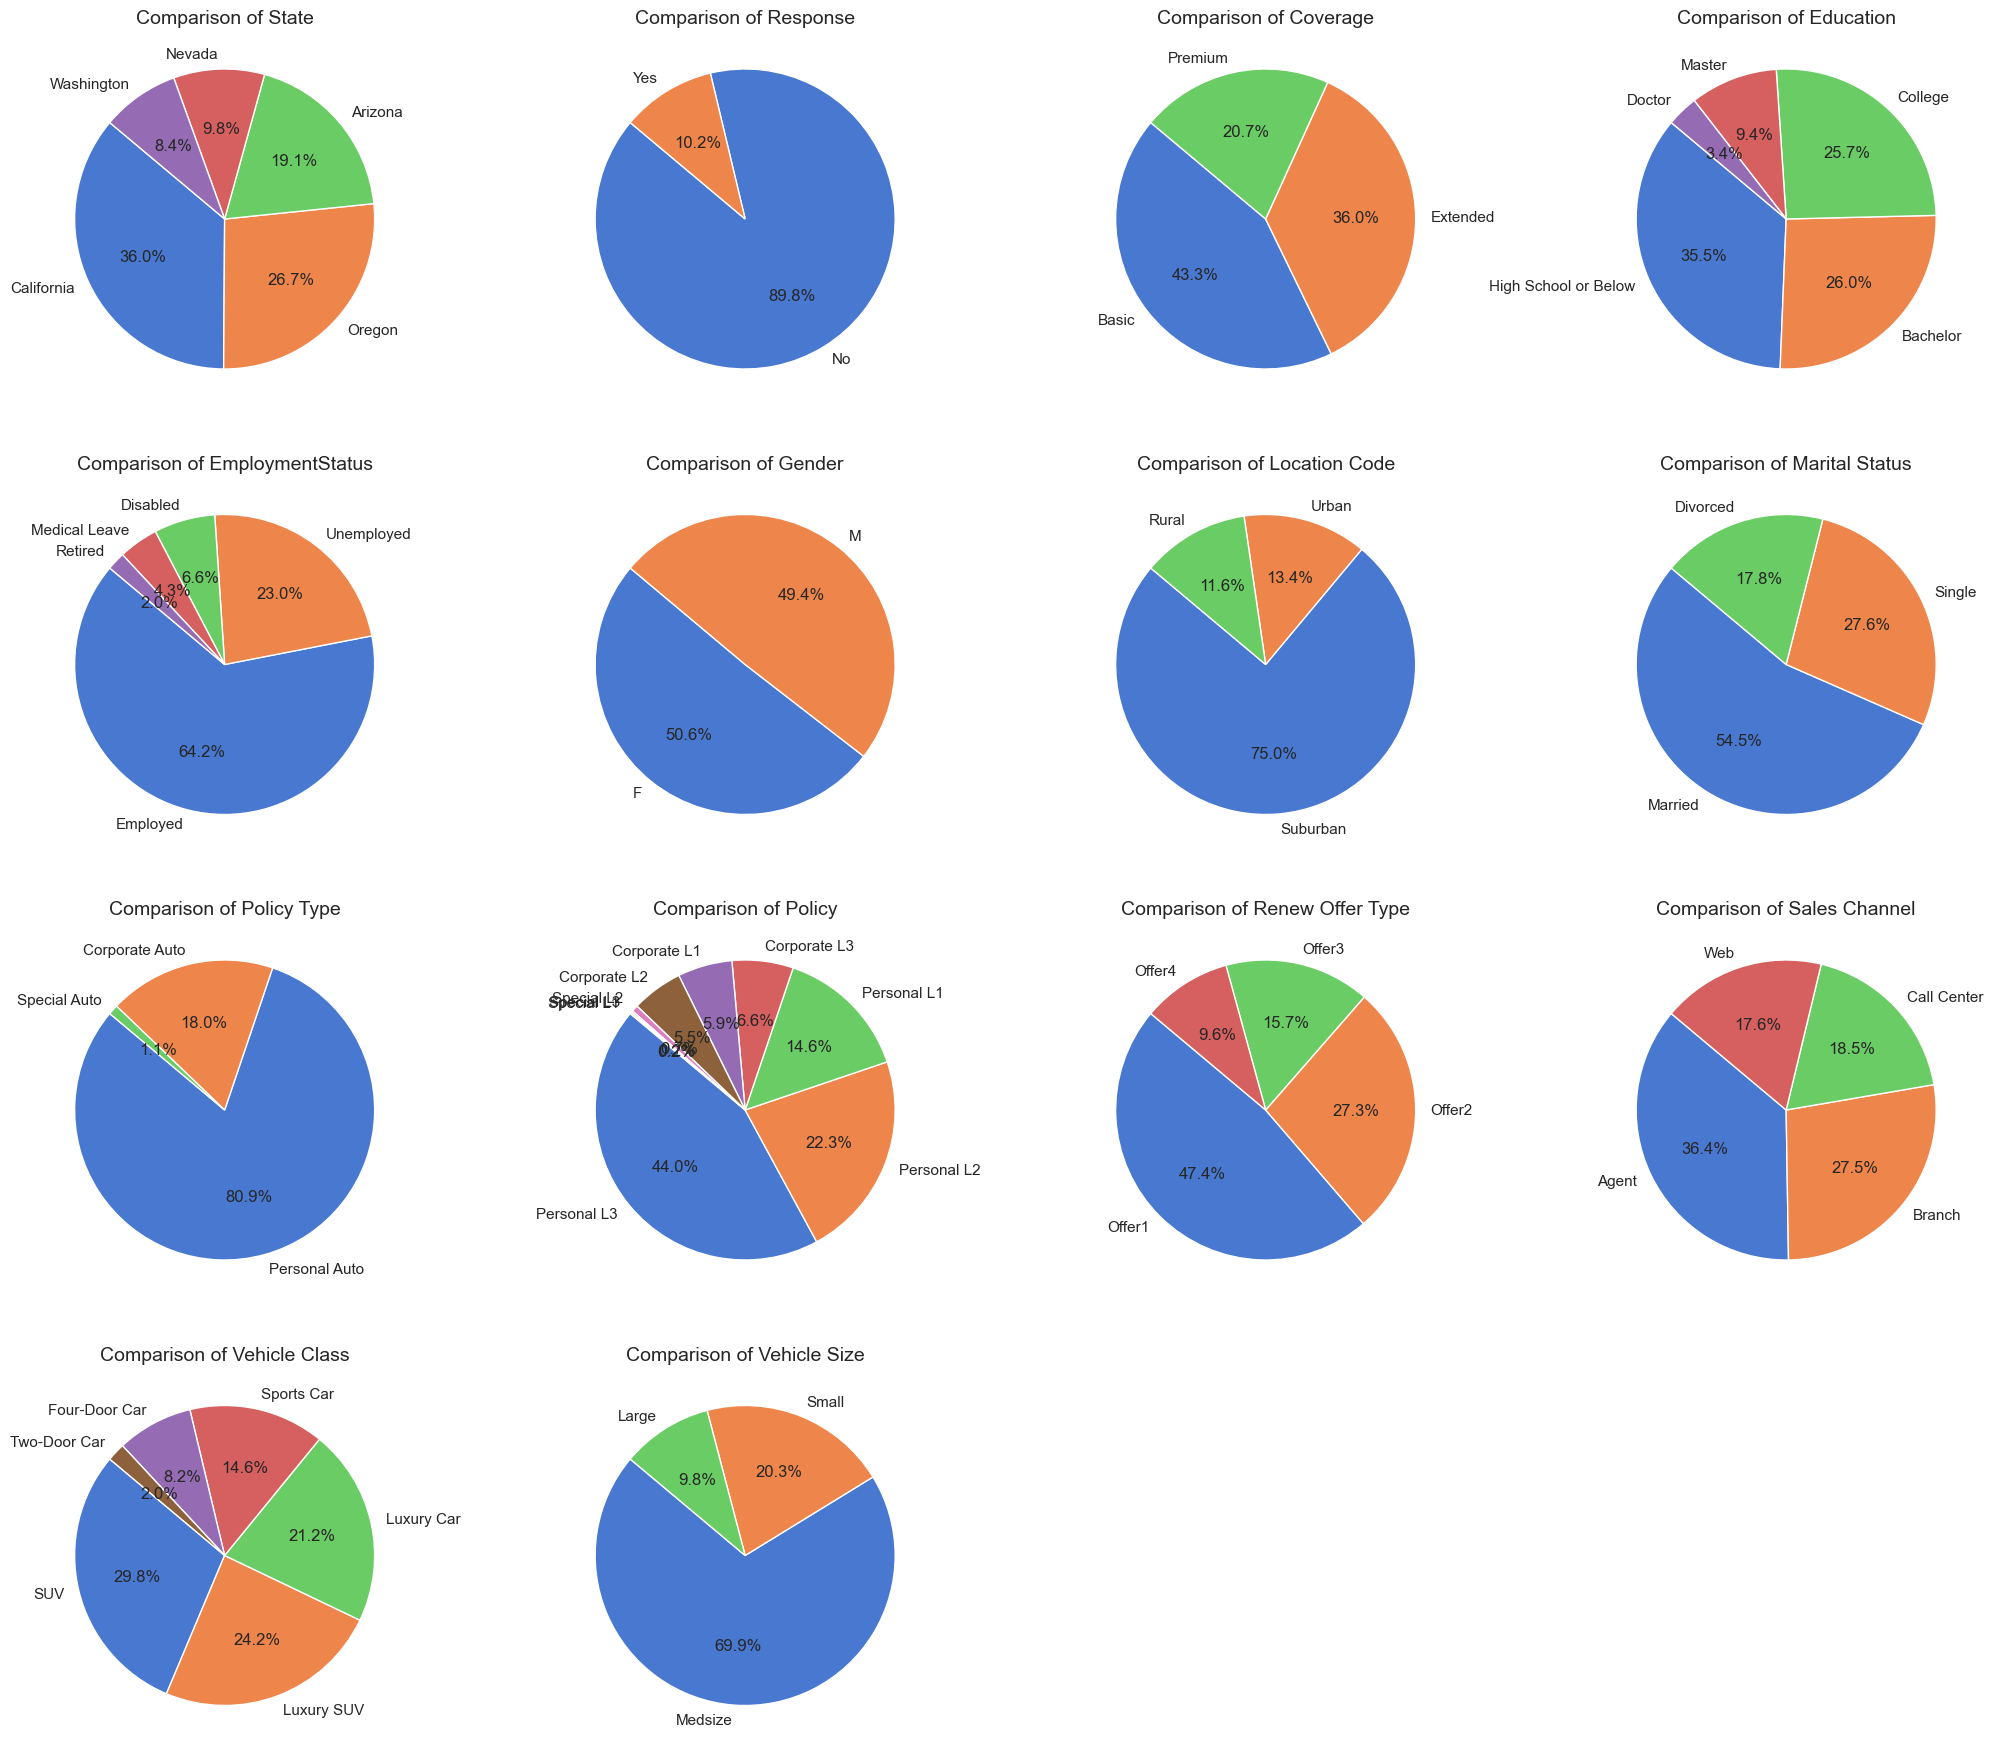

In [757]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    # Calculate the sum of Customer Lifetime Value for each category
    data = df_cluster0[col].value_counts()
    
    # Plot pie chart
    axes[i].pie(data, 
                labels=data.index, 
                autopct='%1.1f%%', 
                startangle=140, 
                colors=sns.color_palette('muted'))
     
    # Set title for each pie chart
    axes[i].set_title(f'Comparison of {col}', fontsize=14)

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


**Primary Values for Each Column**
- State : California
- Response : No 
- Coverage : Basic 
- Education : High School or Below
- EmploymentStatus : Employed
- Gender : Female 
- Location Code : Suburban 
- Marital Status : Married
- Policy Type : Personal Auto
- Policy : Personal L3
- Renew offer Type : Offer1
- Sales Channel : Agent
- Vehicle Class : SUV 
- Vehicle Size : Medsize

#### Heatmap

In [767]:
corr = df_cluster0[num_cols].corr()

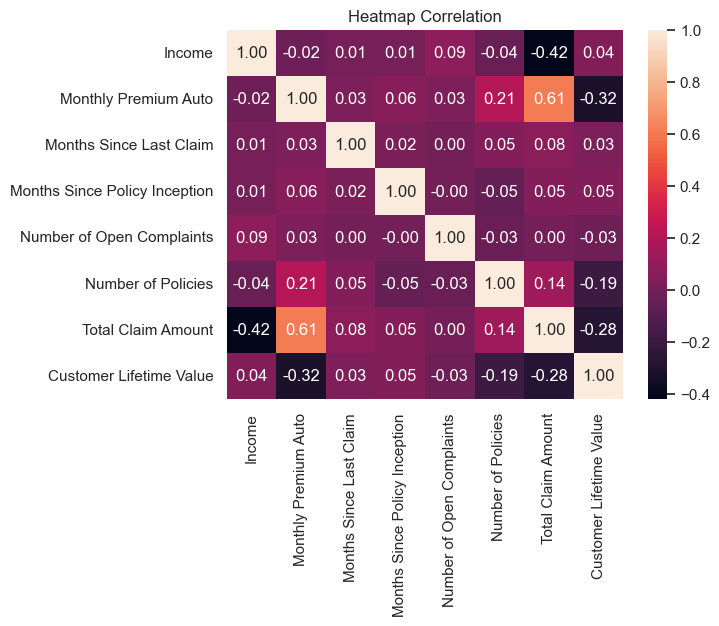

In [768]:
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap Correlation', size = 12)
plt.show()

#### Top 10 CLV 

In [771]:
top_10 = df_cluster0.sort_values(by='Customer Lifetime Value', ascending=False).head(10)
top_10

State Response  Coverage             Education EmploymentStatus  \
1072      Oregon       No  Extended  High School or Below         Employed   
4047  Washington       No  Extended  High School or Below       Unemployed   
4210  California       No  Extended  High School or Below       Unemployed   
5537      Oregon       No  Extended               College       Unemployed   
4752  California       No     Basic               College       Unemployed   
2232     Arizona       No  Extended               College       Unemployed   
701      Arizona       No   Premium              Bachelor         Employed   
3078     Arizona       No  Extended  High School or Below         Disabled   
3708      Oregon       No   Premium               College         Employed   
1415      Oregon       No     Basic  High School or Below         Employed   

     Gender  Income Location Code Marital Status  Monthly Premium Auto  \
1072      M   58958      Suburban        Married                   231   
4047      M       0      Suburban         Single                   242   
4210      M       0      Suburban        Married                   217   
5537      F       0      Suburban        Married                   238   
4752      M       0      Suburban         Single                   198   
2232      F       0      Suburban        Married                   204   
701       F   24964      Suburban        Married                   185   
3078      M   29295      Suburban        Married                   219   
3708      F   77237      Suburban        Married                   283   
1415      F   40740      Suburban         Single                   198   

      Months Since Last Claim  Months Since Policy Inception  \
1072                       31                             74   
4047                        1                             34   
4210                       14                             40   
5537                       19                             29   
4752                        2                             75   
2232                       35                             45   
701                         0                             84   
3078                       25                             50   
3708                       33                             93   
1415                       19                             60   

      Number of Open Complaints  Number of Policies     Policy Type  \
1072                          0                   2   Personal Auto   
4047                          0                   2   Personal Auto   
4210                          1                   2   Personal Auto   
5537                          0                   2   Personal Auto   
4752                          0                   2  Corporate Auto   
2232                          0                   2   Personal Auto   
701                           0                   2   Personal Auto   
3078                          0                   2   Personal Auto   
3708                          0                   2   Personal Auto   
1415                          0                   2   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
1072   Personal L3           Offer1   Call Center         1108.800000   
4047   Personal L1           Offer1        Branch         1742.400000   
4210   Personal L3           Offer1        Branch         1562.400000   
5537   Personal L1           Offer3        Branch         1142.400000   
4752  Corporate L3           Offer2        Branch         2275.265075   
2232   Personal L3           Offer1           Web          979.200000   
701    Personal L2           Offer2         Agent          888.000000   
3078   Personal L3           Offer1         Agent         1328.839129   
3708   Personal L1           Offer4           Web         1358.400000   
1415   Personal L2           Offer1           Web          950.400000   

     Vehicle Class Vehicle Size  Customer Life

In [795]:
top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1072 to 1415
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10 non-null     object 
 1   Response                       10 non-null     object 
 2   Coverage                       10 non-null     object 
 3   Education                      10 non-null     object 
 4   EmploymentStatus               10 non-null     object 
 5   Gender                         10 non-null     object 
 6   Income                         10 non-null     int64  
 7   Location Code                  10 non-null     object 
 8   Marital Status                 10 non-null     object 
 9   Monthly Premium Auto           10 non-null     int64  
 10  Months Since Last Claim        10 non-null     int64  
 11  Months Since Policy Inception  10 non-null     int64  
 12  Number of Open Complaints      10 non-null     int64

In [773]:
top_10.value_counts()

State       Response  Coverage  Education             EmploymentStatus  Gender  Income  Location Code  Marital Status  Monthly Premium Auto  Months Since Last Claim  Months Since Policy Inception  Number of Open Complaints  Number of Policies  Policy Type     Policy        Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size  Customer Lifetime Value  cluster
Arizona     No        Extended  College               Unemployed        F       0       Suburban       Married         204                   35                       45                             0                          2                   Personal Auto   Personal L3   Offer1            Web            979.200000          Luxury SUV     Large         60556.19213              0          1
                                High School or Below  Disabled          M       29295   Suburban       Married         219                   25                       50                             0                   

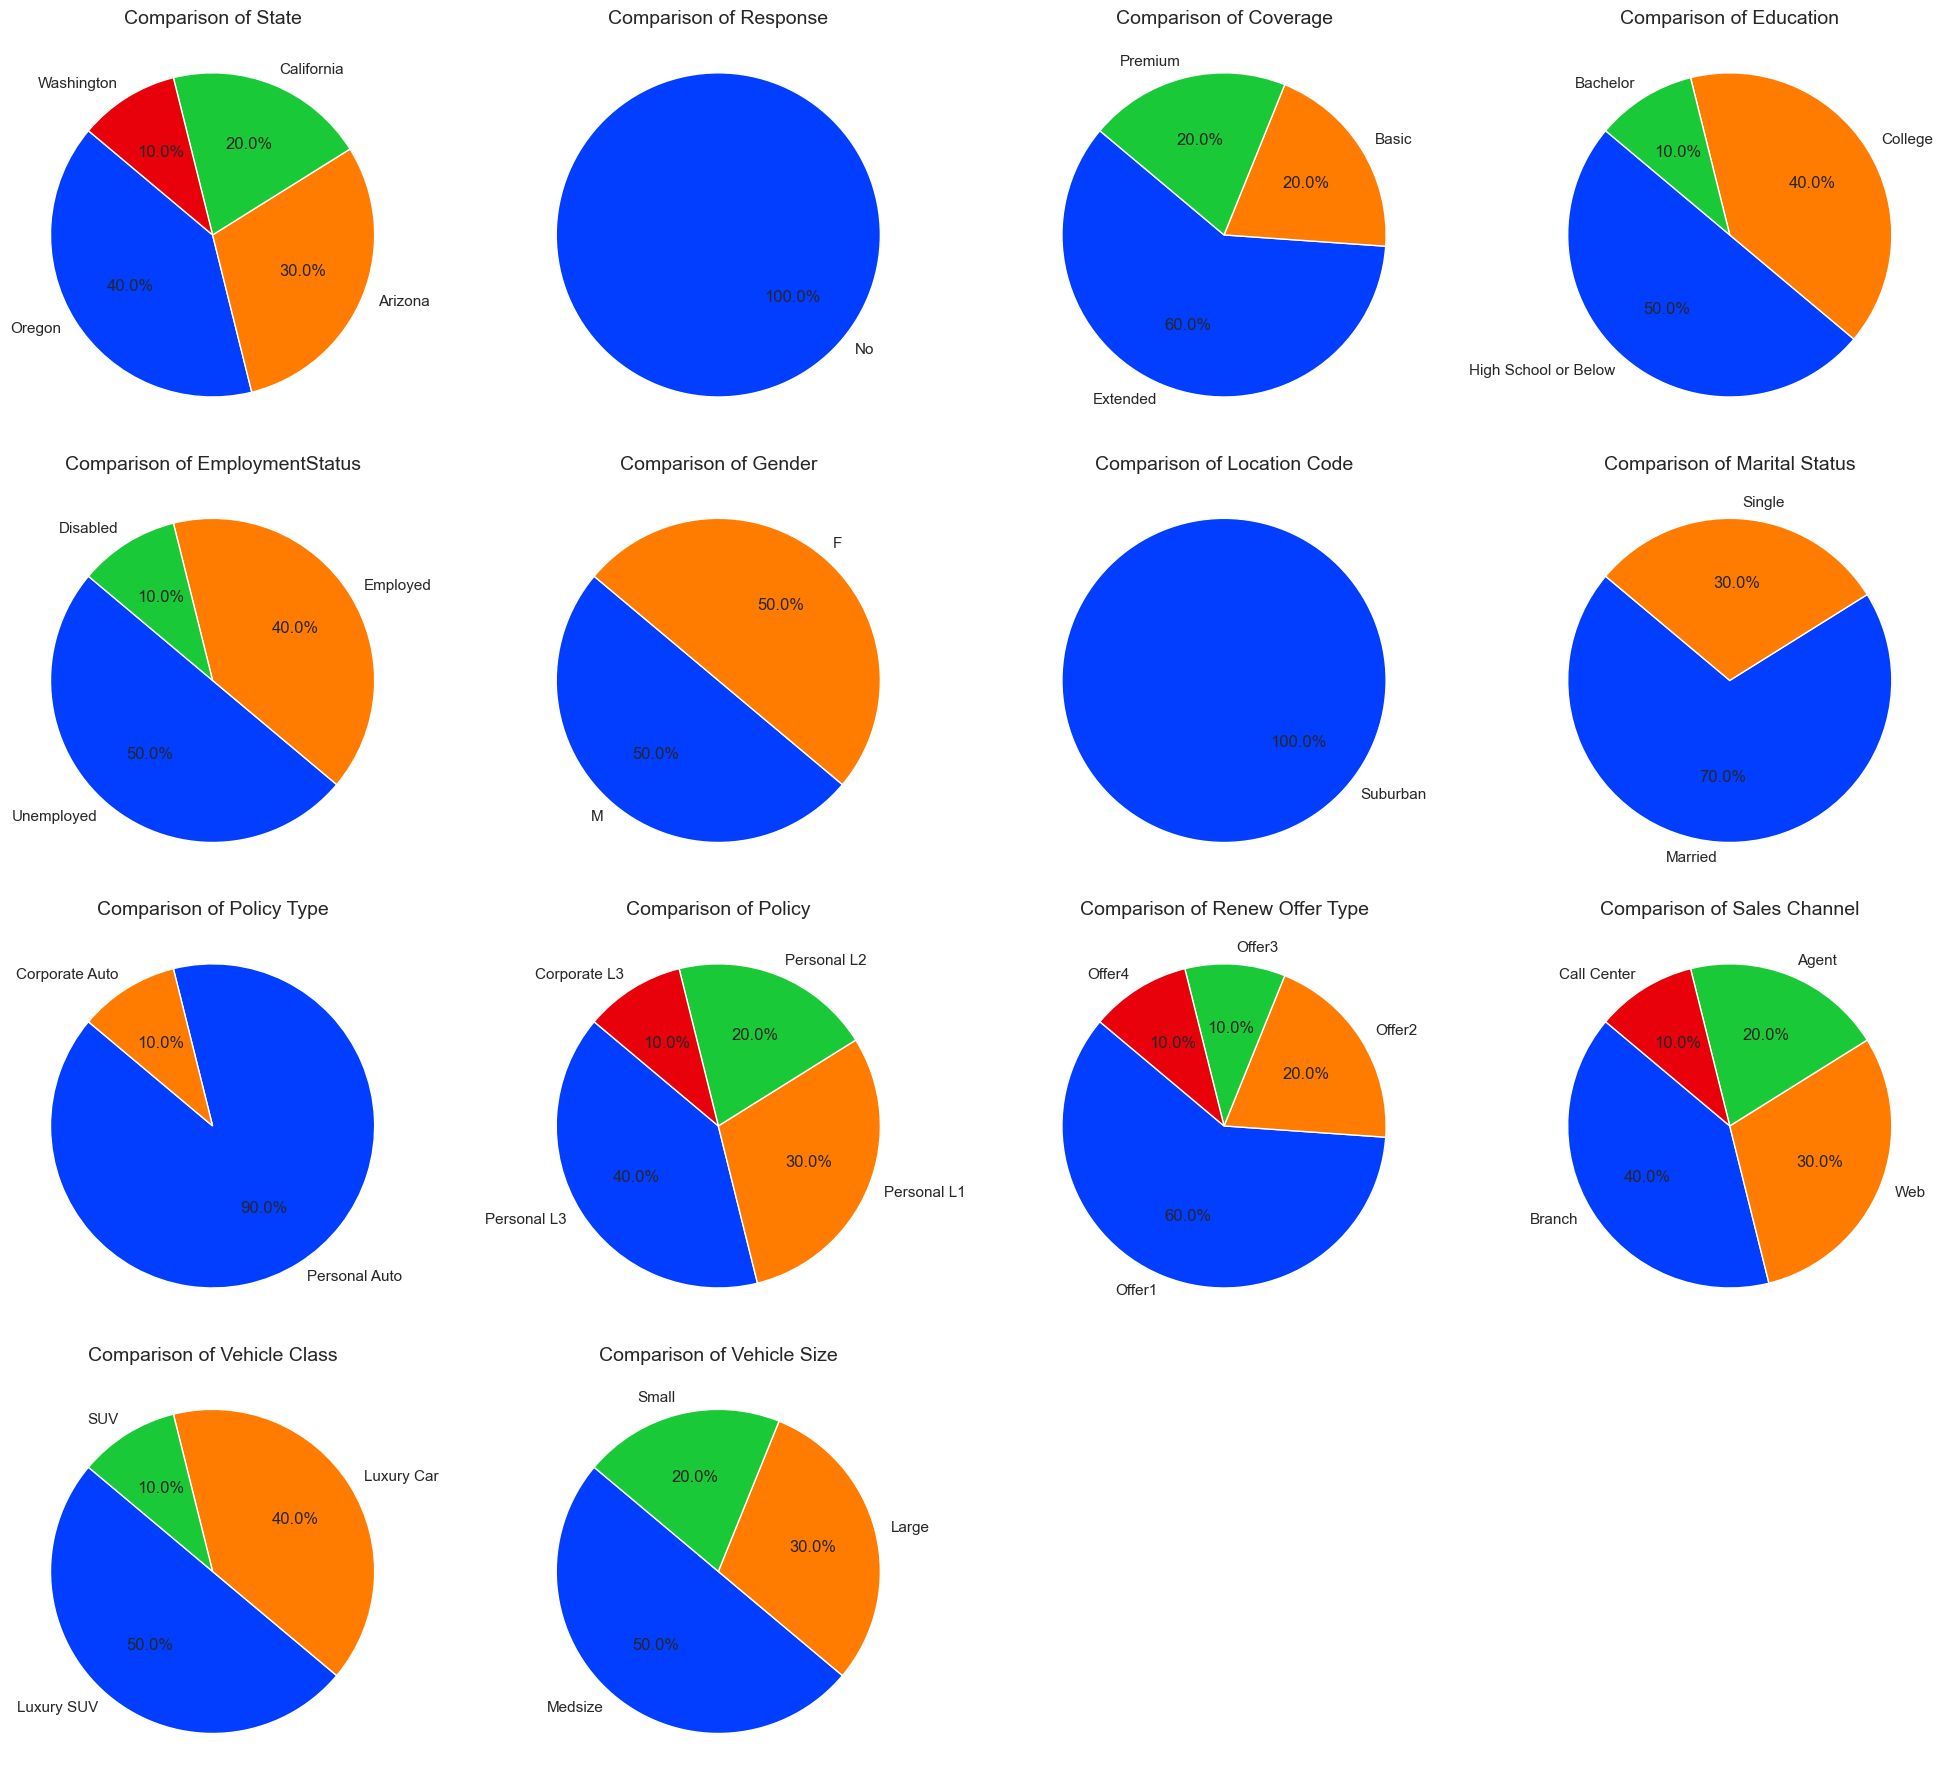

In [798]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    # Calculate the sum of Customer Lifetime Value for each category
    data = top_10[col].value_counts()
    
    # Plot pie chart
    axes[i].pie(data, 
                labels=data.index, 
                autopct='%1.1f%%', 
                startangle=140, 
                colors=sns.color_palette('bright'))
     
    # Set title for each pie chart
    axes[i].set_title(f'Comparison of {col}', fontsize=14)

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


**Primary Values for TOP 10 Columns**
- State : Oregon
- Response : No 
- Coverage : Extended 
- Education : High School or Below
- EmploymentStatus : Unemployed
- Gender : Female/Male
- Location Code : Suburban 
- Marital Status : Married
- Policy Type : Personal Auto
- Policy : Personal L3
- Renew offer Type : Offer1
- Sales Channel : Branch
- Vehicle Class : Luxury SUV 
- Vehicle Size : Medsize

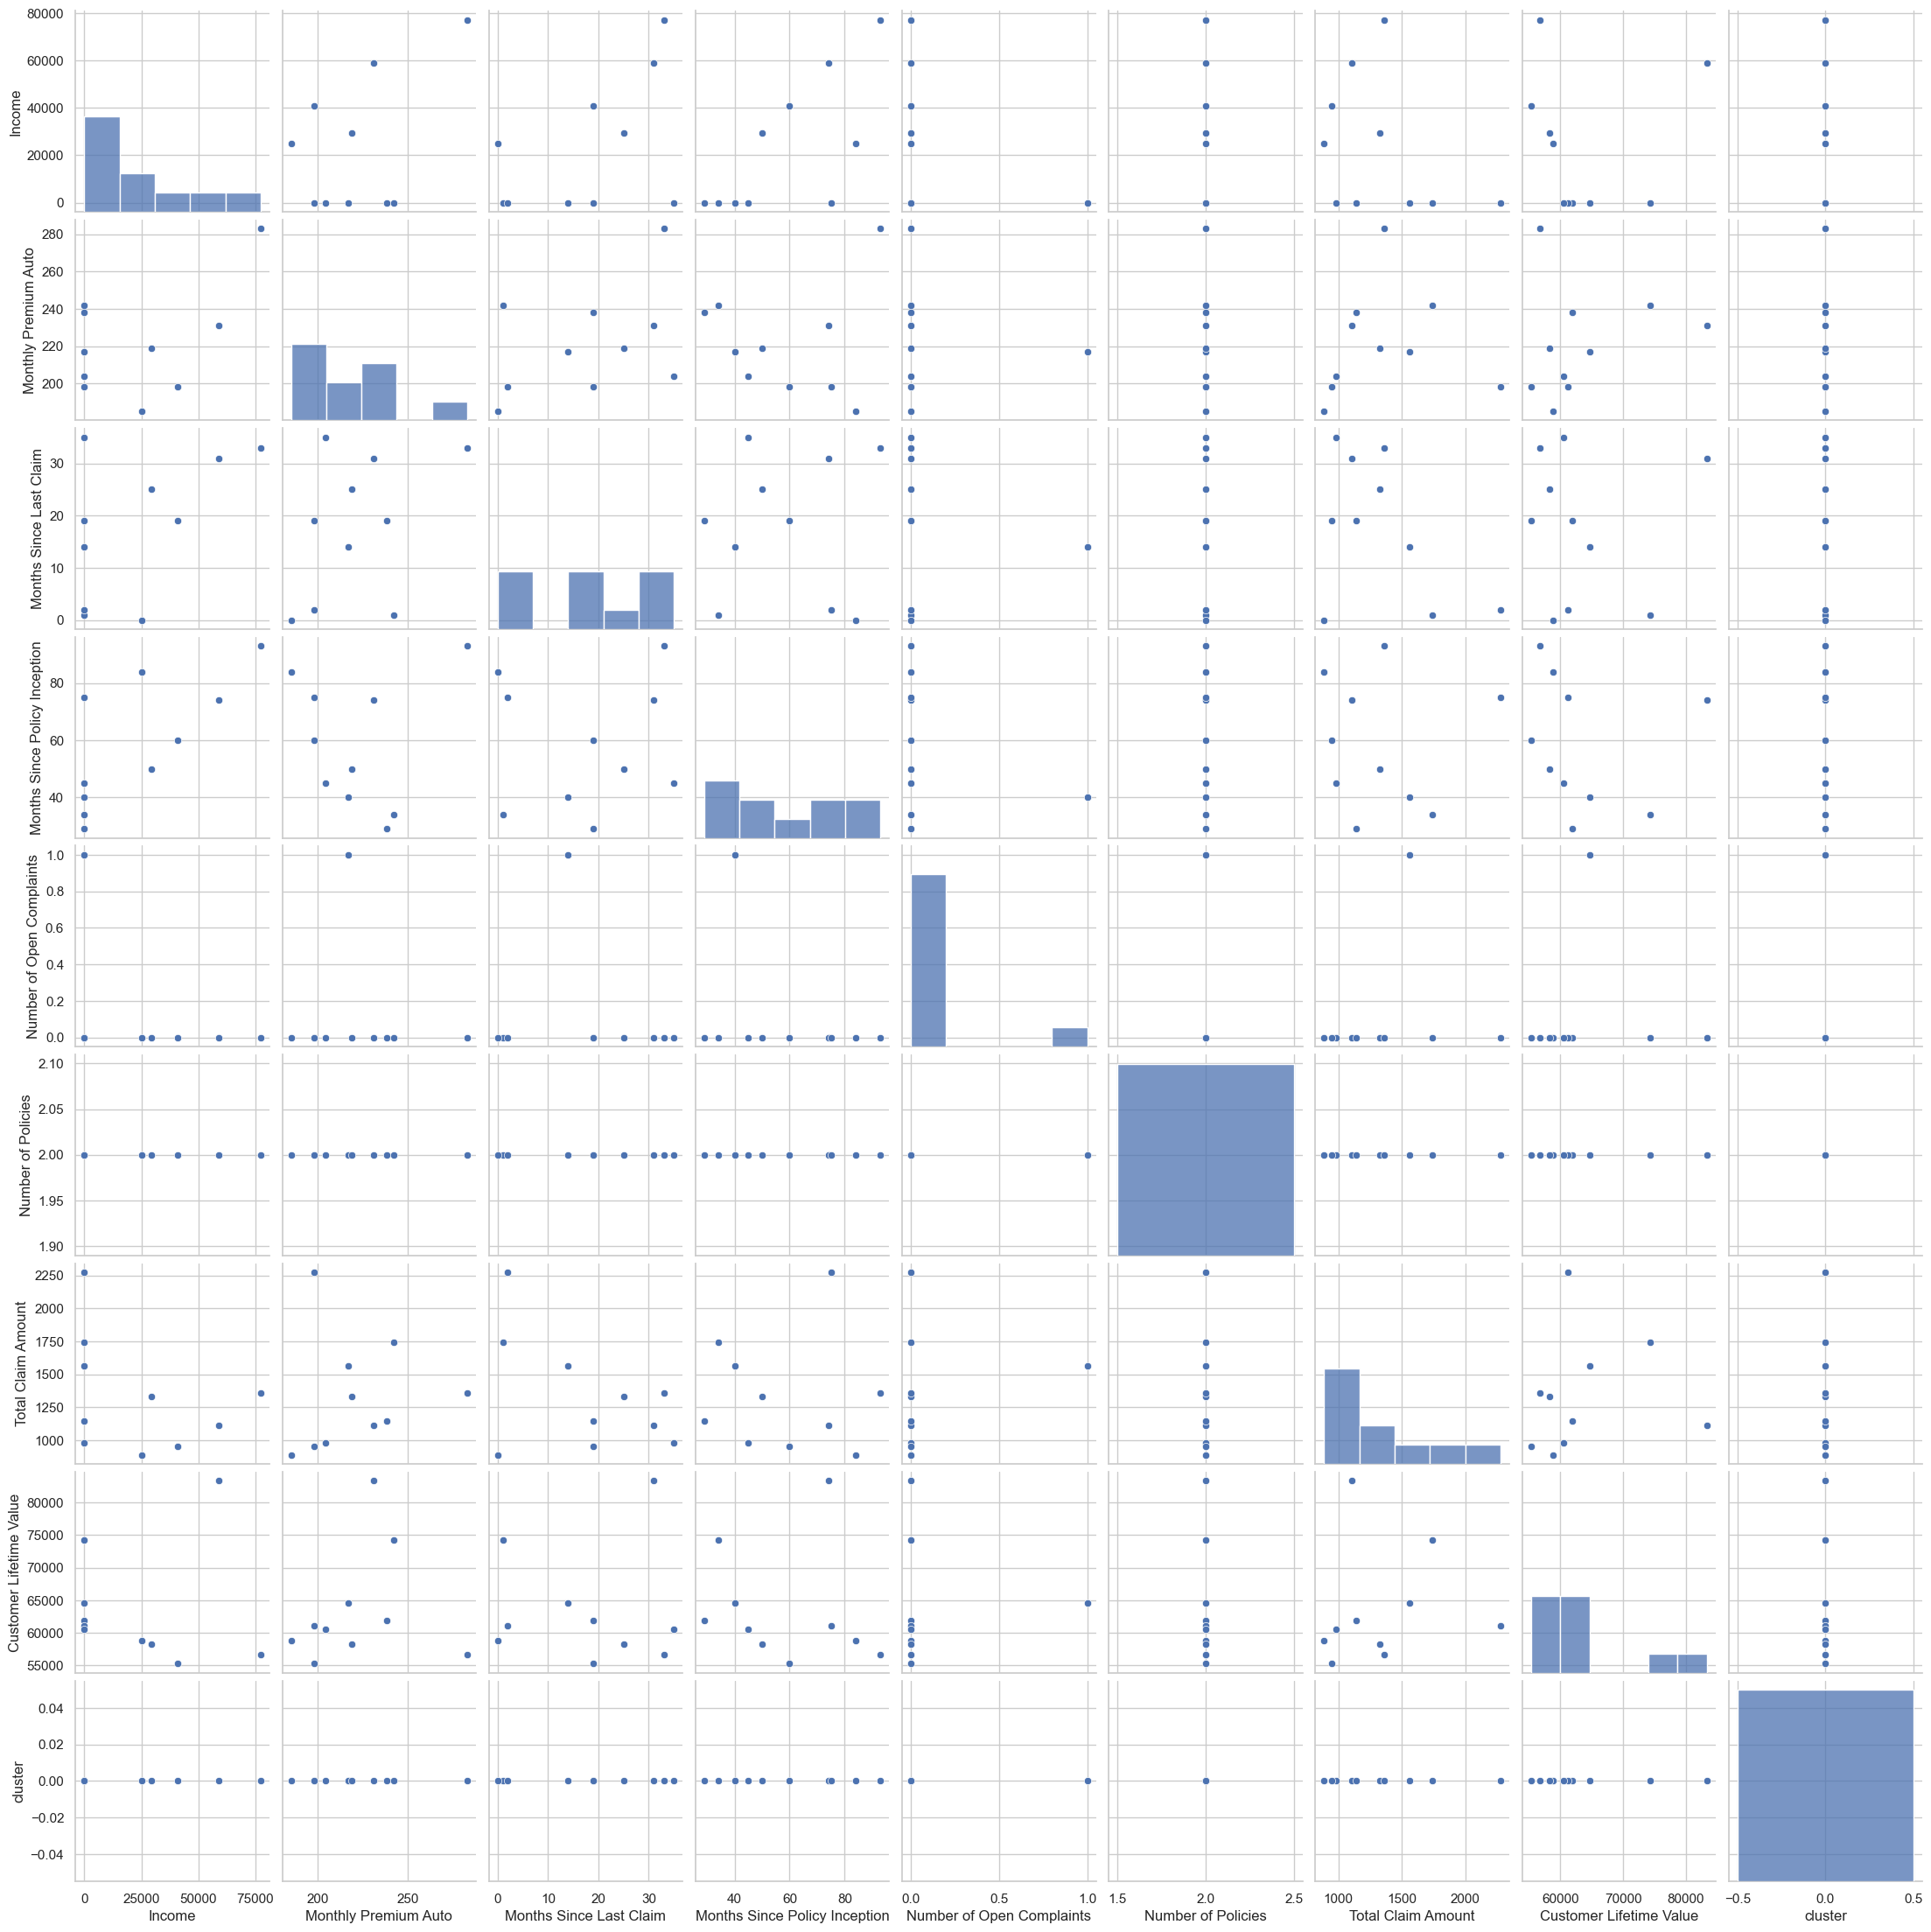

In [796]:
sns.pairplot(top_10)
plt.show()

In [792]:
corr = top_10[num_cols].corr()

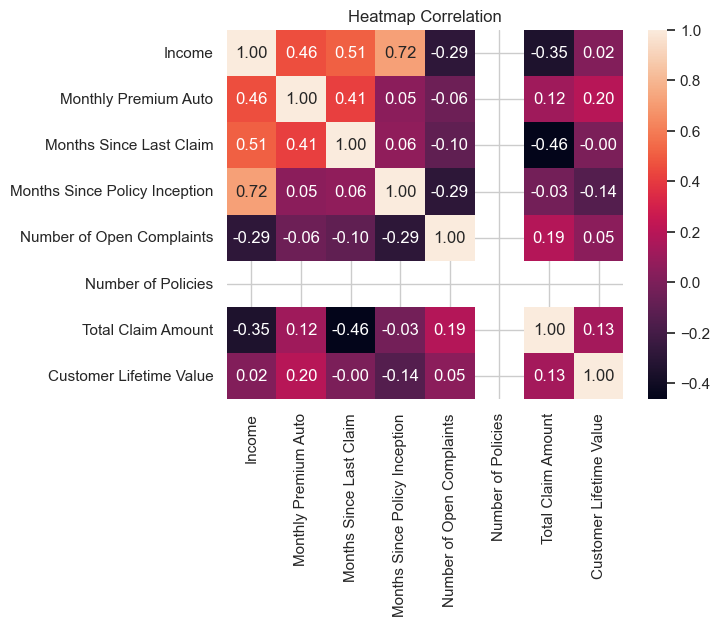

In [797]:
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap Correlation', size = 12)
plt.show()

---

# **Explainable AI**

---

# **Summary**

---

<div style="text-align: center;">
  <h3 style="background-color: navy; color: white; padding: 10px;">Thank You!</h3>
</div>